# PETE 689: Petroleum Data Analytics and Machine Learning

# Final Project: Prediction of Well Deliverables and Economic Metrics Using Well Completions Data

## Notebook 1: Development of Several Data-Driven Models Based on Completion Dataset

## Team Members:

## Ivan Aldana

## Khaled Aldhayee

# Required Python Packages

In [1]:
# Basic Packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Pre-Processing Packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import f_regression, mutual_info_regression

# Cross-validation Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Machine Learning Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

# Evaluation Packages
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Models Exporting Package
import pickle 

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Data Diagnostics

## 1.1. Descriptive Statistics of the Data

In [2]:
# Importing Completion Dataset
df = pd.read_excel('well_data.xlsx', sheet_name = 'Data1_Completion', index_col = 0)
df

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)       TVD(M)  \
653      1.000                3                  400      349.7  2956.900756   
1591     0.889                2                  200      263.6  2956.900756   
1307     0.889                4                  200      199.4  2956.900756   
539      0.889                4                  200      155.5  2956.900756   
682      1.000                4                  300      263.3  2956.900756   
...        ...              ...                  ...        ...          ...   
1321     0.889                2                  400      399.9  2956.900756   
38       0.889                4                  300      165.6  2956.900756   
1347     0.889                3                  200      199.4  2956.900756   
610      1.000                4                  300      263.3  2956.900756   
257      1.000                3                  400      252.1  2956.900756   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   
...                  ...     ...            ...                    ...   
1321                4000      88             88                 4500.0   
38                  2200      65             65                 1136.4   
1347                4000      58            116                 4500.0   
610                 3500      34             68                 1000.0   
257                 2500      25             50                 2000.0   

      FLUID INTENSITY (M3/M)  INJ. RATE  PERM  PAY THICKNESS  \
653                     20.0         18   177             42   
1591                     9.5         18   177             42   
1307                    18.0         18   177             42   
539                     18.1         18   177             42   
682                     12.0         18   177             42   
...                      ...        ...   ...            ...   
1321                    23.8         18   177             42   
38                       4.5         18   177             42   
1347                    45.0         18   177             42   
610                      4.0         18   177             42   
257                     20.0         18   177             42   

      FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
653            154.974670              94.973062  
1591           116.542210             105.143550  
1307           169.716840             365.525890  
539            154.533550             317.082440  
682            140.731700             310.171940  
...                   ...                    ...  
1321           204.165520             251.287760  
38             106.670820             325.450980  
1347           193.969120             101.182460  
610             97.670423             279.915610  
257            169.036360              97.356243  

[1285 rows x 15 columns]

In [3]:
# Showing the descriptive statistics of Completion Dataset
df.describe()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)    AREA (AC)  \
count  1285.000000      1285.000000          1285.000000  1285.000000   
mean      0.944802         3.004669           356.933852   347.370272   
std       0.055521         0.819340           123.615319   158.168099   
min       0.889000         0.000000           200.000000   110.400000   
25%       0.889000         2.000000           200.000000   224.300000   
50%       1.000000         3.000000           300.000000   309.800000   
75%       1.000000         4.000000           400.000000   448.600000   
max       1.000000         4.000000           536.000000   801.600000   

             TVD(M)  LATERAL LENGTH (M)       STAGES  PERF CLUSTERS  \
count  1.285000e+03         1285.000000  1285.000000    1285.000000   
mean   2.956901e+03         3895.501946    70.221012      94.133074   
std    7.096821e-11         1105.093419    32.987622      29.907180   
min    2.956901e+03         2200.000000    25.000000      49.000000   
25%    2.956901e+03         3100.000000    46.000000      68.000000   
50%    2.956901e+03         4000.000000    65.000000      91.000000   
75%    2.956901e+03         4500.000000    91.000000     116.000000   
max    2.956901e+03         6000.000000   155.000000     156.000000   

       SAND INTENSITY(KG.M3)  FLUID INTENSITY (M3/M)  INJ. RATE    PERM  \
count            1285.000000             1285.000000     1285.0  1285.0   
mean             2721.288839               18.394599       18.0   177.0   
std              1196.769557               10.525048        0.0     0.0   
min              1000.000000                4.000000       18.0   177.0   
25%              2000.000000               10.600000       18.0   177.0   
50%              3000.000000               16.000000       18.0   177.0   
75%              4000.000000               22.700000       18.0   177.0   
max              4545.500000               45.500000       18.0   177.0   

       PAY THICKNESS  FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
count    1285.000000          1285.000000            1285.000000  
mean       41.962646           163.006643             201.204228  
std         0.668731            36.425999              97.729975  
min        30.000000            87.609094              88.630919  
25%        42.000000           136.211660             108.886080  
50%        42.000000           160.519880             176.328790  
75%        42.000000           187.541580             301.886290  
max        42.000000           254.072020             375.121530

In [4]:
# Importing the well deliverables and economic metrics
df2 = pd.read_excel('well_data.xlsx', sheet_name = 'Data2', index_col = 0)
df2

REC. EFFICIENCY (GAS)   DRILLING COST  COMPLETION COST  TOTAL WELL COST  \
653                0.434648     3396.489455      4707.802059      8404.291514   
1591               0.682453     5152.752393      4475.043418      9927.795810   
1307               0.734736     3884.340271      7522.065922     11706.406193   
539                0.709425     3006.208802      5276.606255      8582.815057   
682                0.523262     3396.489455      4233.663765      7930.153221   
...                     ...             ...              ...              ...   
1321               0.481948     3884.340271      7838.681623     12023.021894   
38                 0.500401     2128.080000      2178.140000      4606.220000   
1347               0.751342     3884.340271     10122.324974     14306.665245   
610                0.460133     3396.489455      2161.347795      5857.837250   
257                0.435771     2420.790000      3380.260000      6101.050000   

          IP90 GAS    IP90 COND  GAS (EUR)  COND (EUR)  EFFECTIVE IRR  \
653    7888.914474   980.072400   5.661301  693.568365       0.853884   
1591  10600.657895  1322.339656   6.712743  831.895138       1.087076   
1307   9868.421053  1225.836002   5.392724  686.276025       0.728381   
539    5897.587719   733.098023   4.067688  501.384134       0.409468   
682    5629.418860   705.628719   5.131829  615.644046       0.468071   
...            ...          ...        ...         ...            ...   
1321   8070.175439   980.668801   7.180634  872.596968       0.590547   
38     4341.864035   552.242255   3.086595  377.570002       0.718012   
1347   9868.421053  1225.836002   5.471605  701.758353       0.520448   
610    4335.932018   574.540782   4.508992  537.078914       0.510529   
257    4781.885965   597.314960   4.091575  493.556033       0.584119   

           PV(10)       PV(15)   Royalty    PAYOUT       LIFE    NETBACK  \
653   6930.382442  5358.070652  0.082517  1.333333  40.000000  14.327106   
1591  9552.278968  7588.689882  0.090752  1.166667  40.000000  14.497720   
1307  7666.190920  6020.435025  0.050019  1.416667  34.166667  15.766205   
539   4064.735533  2771.923567  0.048097  2.083333  36.583333  14.814777   
682   5073.862174  3468.582212  0.065236  2.000000  40.000000  14.407753   
...           ...          ...       ...       ...        ...        ...   
1321  8393.351940  6171.466673  0.068335  1.666667  40.000000  15.034083   
38    3260.652313  2450.964917  0.063887  1.416667  40.000000  13.273131   
1347  6595.743799  4981.103020  0.053391  1.666667  28.166667  16.038716   
610   4216.055700  2891.939548  0.082462  1.916667  40.000000  13.584277   
257   4291.819549  3116.586405  0.069329  1.750000  40.000000  13.823880   

           F&D  RECYCLE RATIO   PV15 PI  
653   5.133588       2.790856  1.664542  
1591  5.089388       2.848618  1.796763  
1307  7.385450       2.134766  1.536067  
539   7.277691       2.035642  1.336641  
682   5.391182       2.672466  1.455917  
...        ...            ...       ...  
1321  5.809993       2.587625  1.535044  
38    5.163909       2.570365  1.554635  
1347  8.865794       1.809056  1.362913  
610   4.545972       2.988201  1.514597  
257   5.190239       2.663438  1.532463  

[1285 rows x 18 columns]

In [5]:
# Showing the descriptive statistics of well deliverables and economic metrics
df2.describe()

REC. EFFICIENCY (GAS)   DRILLING COST  COMPLETION COST  \
count            1285.000000     1285.000000      1285.000000   
mean                0.514556     3782.354988      5697.137615   
std                 0.148113     1078.189765      2584.426794   
min                 0.263264     2128.080000      1726.710000   
25%                 0.384340     3006.208802      3771.979957   
50%                 0.503286     3884.340271      5217.299570   
75%                 0.659862     4372.191087      7032.211993   
max                 0.764894     5835.468053     15045.283798   

       TOTAL WELL COST      IP90 GAS    IP90 COND    GAS (EUR)   COND (EUR)  \
count      1285.000000   1285.000000  1285.000000  1285.000000  1285.000000   
mean       9779.492167   7441.395590   924.774890     6.007081   733.610545   
std        3340.152033   2085.763660   254.531211     1.858333   224.588543   
min        4154.780000   3208.618421   434.392393     2.427885   300.548088   
25%        7306.600000   5897.587719   733.839313     4.667329   570.815011   
50%        9209.345334   7746.480263   965.922737     5.843531   710.792397   
75%       11572.539323   9337.949561  1171.498289     7.113820   871.821402   
max       21180.751852  11096.502193  1348.419602    11.920616  1431.514244   

       EFFECTIVE IRR        PV(10)        PV(15)      Royalty       PAYOUT  \
count    1285.000000   1285.000000   1285.000000  1285.000000  1285.000000   
mean        0.693975   7129.354047   5342.570310     0.074159     1.561219   
std         0.188999   2400.927484   1877.431387     0.014249     0.264184   
min         0.290406   1772.832890   1034.881812     0.048094     1.083333   
25%         0.560955   5362.753767   3923.886710     0.063707     1.333333   
50%         0.670187   6892.046887   5183.135487     0.074117     1.500000   
75%         0.821310   8600.767465   6559.190150     0.084779     1.750000   
max         1.309550  13836.220913  10773.749311     0.106768     2.750000   

              LIFE      NETBACK          F&D  RECYCLE RATIO      PV15 PI  
count  1285.000000  1285.000000  1285.000000    1285.000000  1285.000000  
mean     38.596174    14.548797     5.672589       2.621170     1.579368  
std       4.015694     0.571453     0.970975       0.343608     0.131787  
min      15.166667    12.954338     4.185948       1.653664     1.193960  
25%      40.000000    14.145905     4.971429       2.386137     1.484414  
50%      40.000000    14.524142     5.512276       2.636682     1.576187  
75%      40.000000    14.933044     6.183943       2.867761     1.669963  
max      40.000000    16.432148     9.730413       3.400484     1.891551

## 1.2. Identifying Corrupted Data (if any)

In [6]:
# Completion Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 653 to 257
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LL MULTI                1285 non-null   float64
 1   SAND CONC MODEL         1285 non-null   int64  
 2   LATERAL SPACING (M)     1285 non-null   int64  
 3   AREA (AC)               1285 non-null   float64
 4   TVD(M)                  1285 non-null   float64
 5   LATERAL LENGTH (M)      1285 non-null   int64  
 6   STAGES                  1285 non-null   int64  
 7   PERF CLUSTERS           1285 non-null   int64  
 8   SAND INTENSITY(KG.M3)   1285 non-null   float64
 9   FLUID INTENSITY (M3/M)  1285 non-null   float64
 10  INJ. RATE               1285 non-null   int64  
 11  PERM                    1285 non-null   int64  
 12  PAY THICKNESS           1285 non-null   int64  
 13  FRACTURE 1/2 LENGTH     1285 non-null   float64
 14  FRACTURE CONDUCTIVITY   1285 non-null  

In [7]:
# well deliverables and economic metrics information
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 653 to 257
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REC. EFFICIENCY (GAS)  1285 non-null   float64
 1    DRILLING COST         1285 non-null   float64
 2   COMPLETION COST        1285 non-null   float64
 3   TOTAL WELL COST        1285 non-null   float64
 4   IP90 GAS               1285 non-null   float64
 5   IP90 COND              1285 non-null   float64
 6   GAS (EUR)              1285 non-null   float64
 7   COND (EUR)             1285 non-null   float64
 8   EFFECTIVE IRR          1285 non-null   float64
 9   PV(10)                 1285 non-null   float64
 10  PV(15)                 1285 non-null   float64
 11  Royalty                1285 non-null   float64
 12  PAYOUT                 1285 non-null   float64
 13  LIFE                   1285 non-null   float64
 14  NETBACK                1285 non-null   float64
 15  F&D

In [8]:
# Checking for any possible corrupted data in the completion dataset
df.replace([np.inf, -np.inf, -999, '', " ", 'inf', 'NaN', None], np.nan, inplace=True)
(pd.isnull(df)==True).any(axis=0)

LL MULTI                  False
SAND CONC MODEL           False
LATERAL SPACING (M)       False
AREA (AC)                 False
TVD(M)                    False
LATERAL LENGTH (M)        False
STAGES                    False
PERF CLUSTERS             False
SAND INTENSITY(KG.M3)     False
FLUID INTENSITY (M3/M)    False
INJ. RATE                 False
PERM                      False
PAY THICKNESS             False
FRACTURE 1/2 LENGTH       False
FRACTURE CONDUCTIVITY     False
dtype: bool

In [9]:
# Checking for any possible corrupted data in the well deliverables and economic metrics
df2.replace([np.inf, -np.inf, -999, '', " ", 'inf', 'NaN', None], np.nan, inplace=True)
(pd.isnull(df2)==True).any(axis=0)

REC. EFFICIENCY (GAS)    False
 DRILLING COST           False
COMPLETION COST          False
TOTAL WELL COST          False
IP90 GAS                 False
IP90 COND                False
GAS (EUR)                False
COND (EUR)               False
EFFECTIVE IRR            False
PV(10)                   False
PV(15)                   False
Royalty                  False
PAYOUT                   False
LIFE                     False
NETBACK                  False
F&D                      False
RECYCLE RATIO            False
PV15 PI                  False
dtype: bool

### Both completion dataset and well deliverables along with economic metrics are uncorrupted and clean

# 2. Identifying Features

### From the statistics of the completion dataset, we can conclude that the true verical depth (TVD), injection rates, and permeability can be dropped from the dataset since they have a standard deviation of zero, and hence, they are not descriptive parameters to predict well deliverables and economic metrics

In [10]:
# Dropping true vertical depth, injection rates, and permeability from the completion dataset
df = df.drop(['TVD(M)','INJ. RATE','PERM'], axis=1)

In [11]:
# Assigning the features to X
X = df
X

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)  \
653      1.000                3                  400      349.7   
1591     0.889                2                  200      263.6   
1307     0.889                4                  200      199.4   
539      0.889                4                  200      155.5   
682      1.000                4                  300      263.3   
...        ...              ...                  ...        ...   
1321     0.889                2                  400      399.9   
38       0.889                4                  300      165.6   
1347     0.889                3                  200      199.4   
610      1.000                4                  300      263.3   
257      1.000                3                  400      252.1   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   
...                  ...     ...            ...                    ...   
1321                4000      88             88                 4500.0   
38                  2200      65             65                 1136.4   
1347                4000      58            116                 4500.0   
610                 3500      34             68                 1000.0   
257                 2500      25             50                 2000.0   

      FLUID INTENSITY (M3/M)  PAY THICKNESS  FRACTURE 1/2 LENGTH  \
653                     20.0             42           154.974670   
1591                     9.5             42           116.542210   
1307                    18.0             42           169.716840   
539                     18.1             42           154.533550   
682                     12.0             42           140.731700   
...                      ...            ...                  ...   
1321                    23.8             42           204.165520   
38                       4.5             42           106.670820   
1347                    45.0             42           193.969120   
610                      4.0             42            97.670423   
257                     20.0             42           169.036360   

      FRACTURE CONDUCTIVITY  
653               94.973062  
1591             105.143550  
1307             365.525890  
539              317.082440  
682              310.171940  
...                     ...  
1321             251.287760  
38               325.450980  
1347             101.182460  
610              279.915610  
257               97.356243  

[1285 rows x 12 columns]

# 3. Identifying Targets

## 3.1. Data Visualization for the Targets

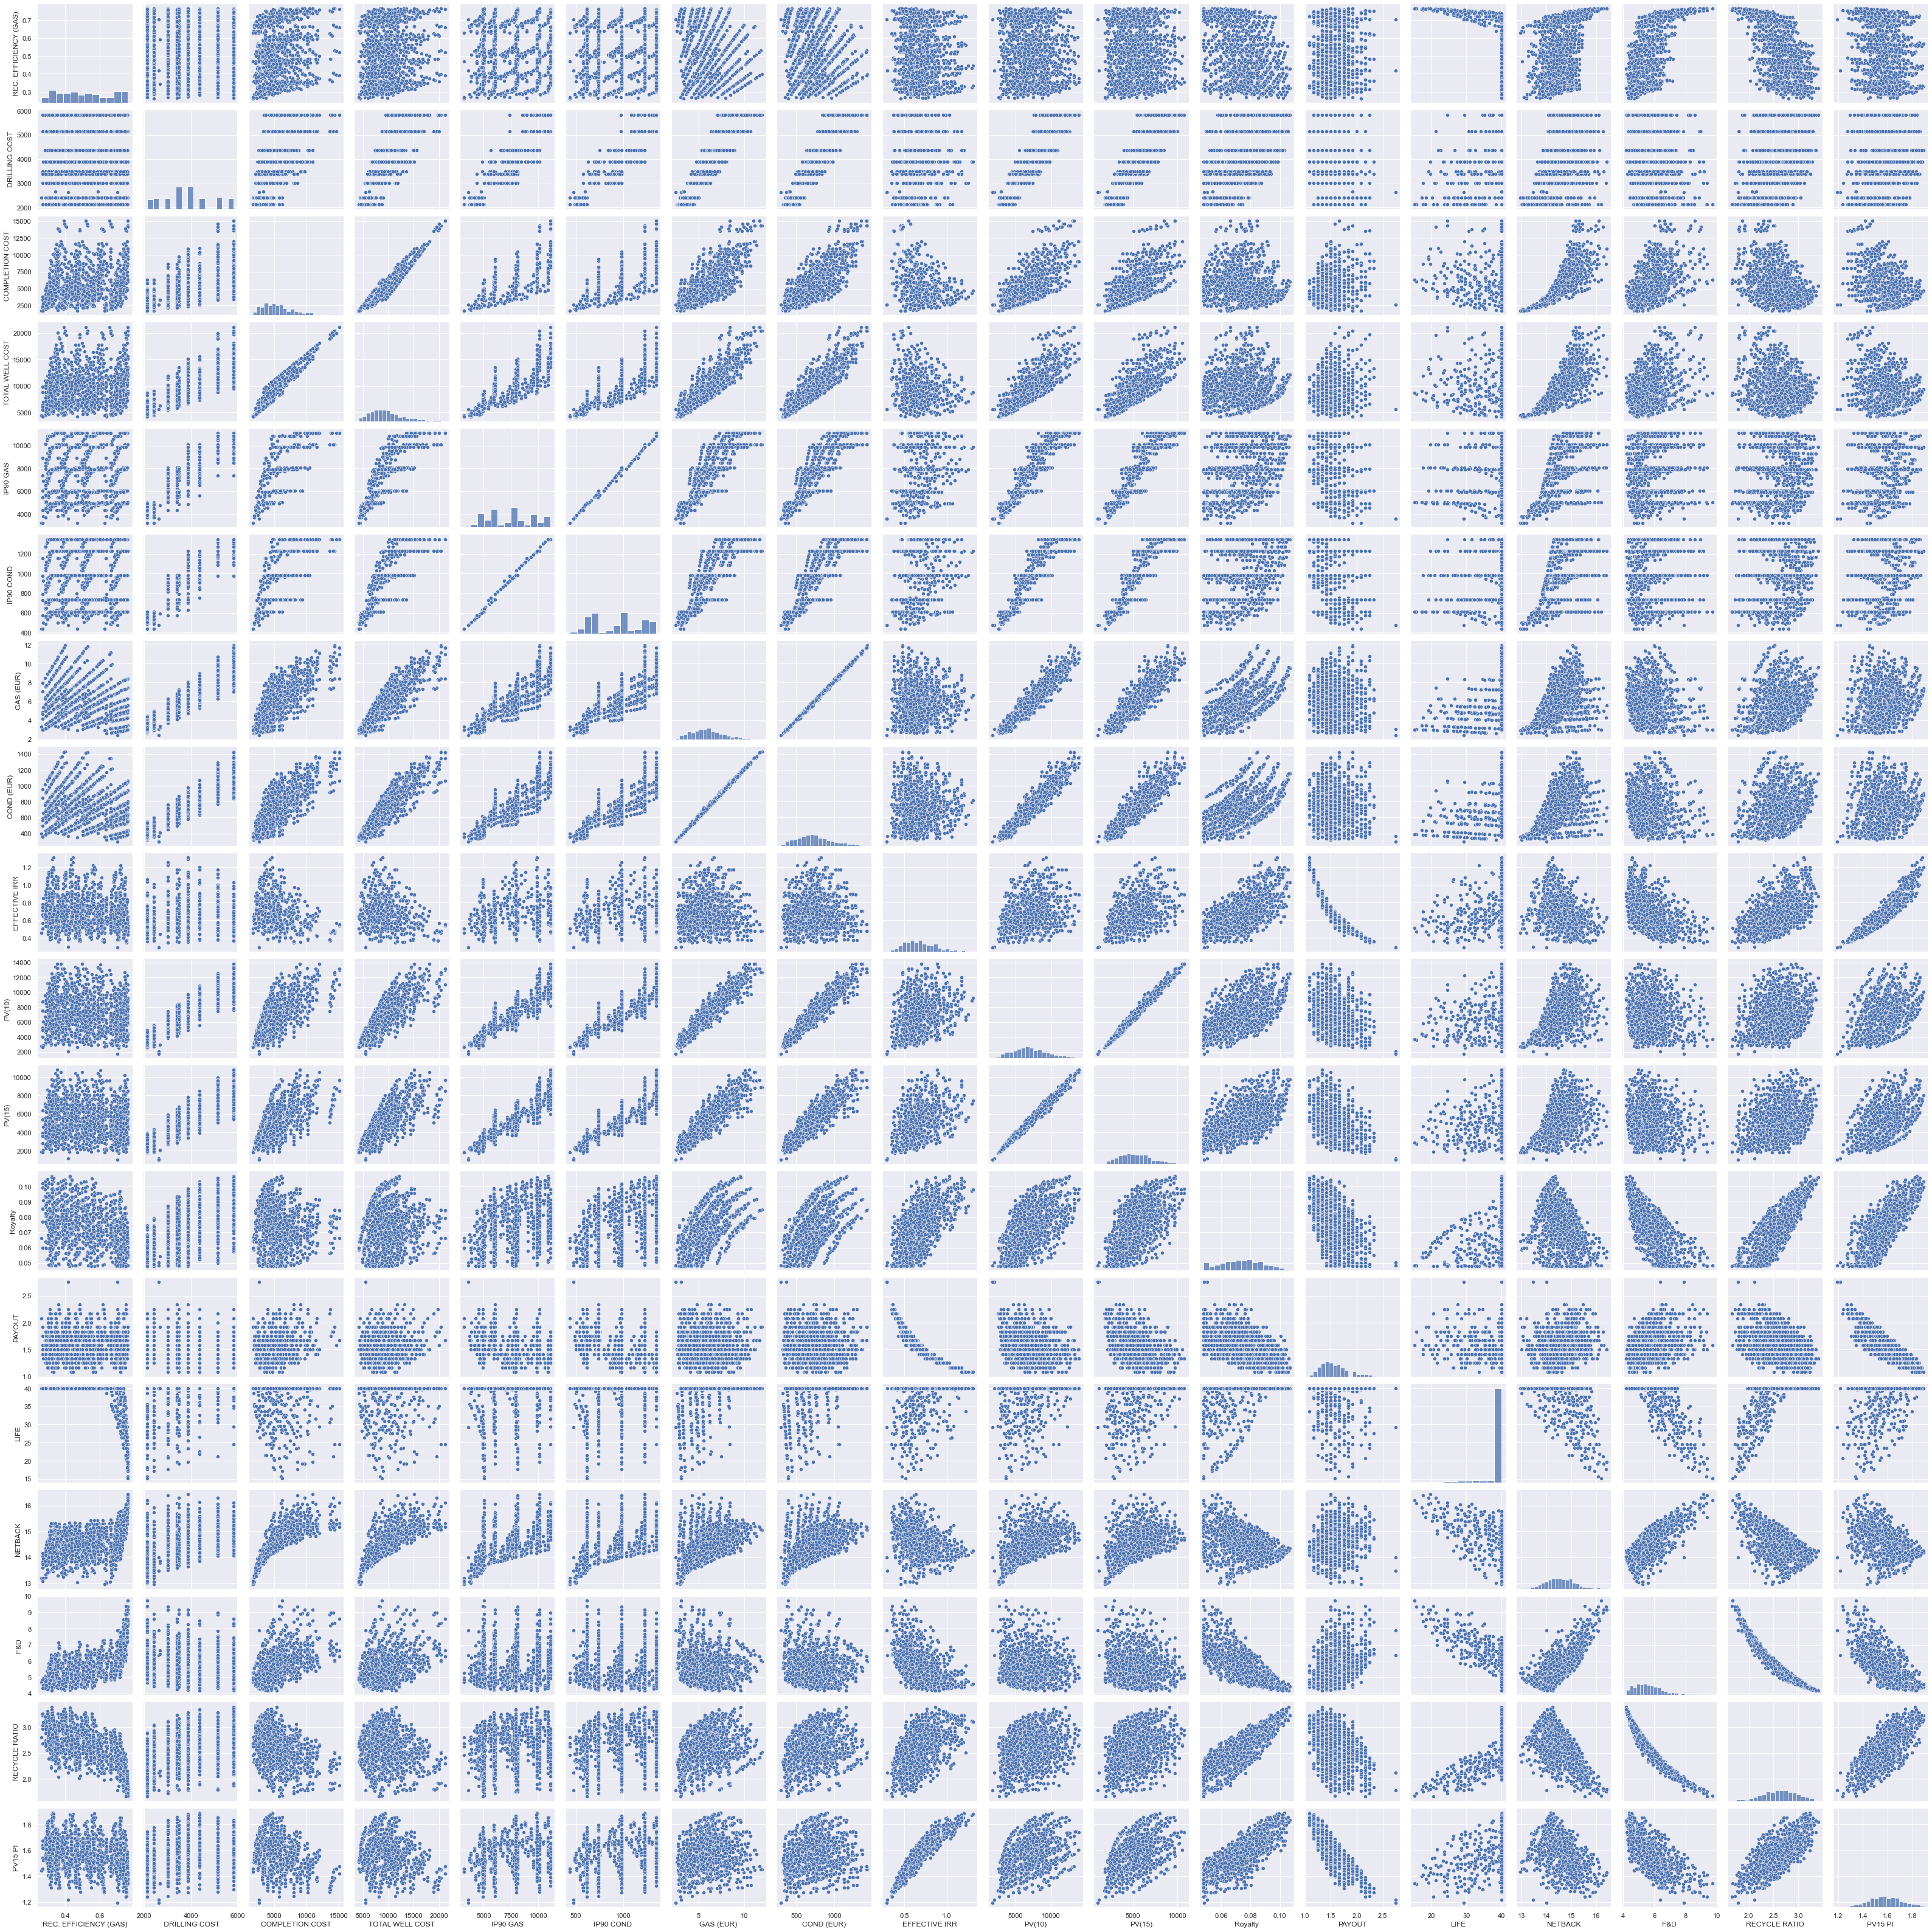

In [12]:
# Visualizing the target dataset using cross-plot
sns.pairplot(df2)

<AxesSubplot:>

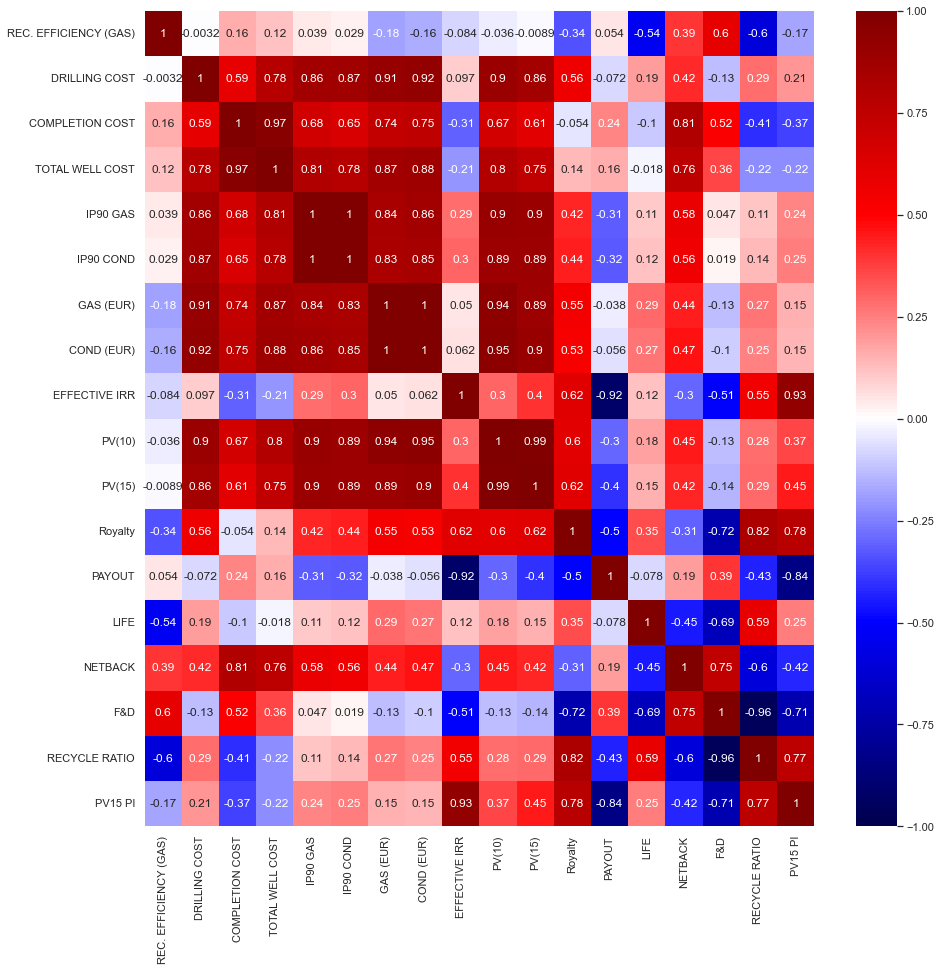

In [13]:
# calculate the correlation matrix to generate Pearson correlation map
corr_pearson = df2.corr(method='pearson')

# plot Pearson correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns,center=0, vmin=-1, vmax=1, cmap='seismic', annot=True)

### From the above cross-plot and Pearson correlation heatmap, it can be deduce that a lot of parameters in the target dataset (well deliverables and economic metrics) have high collinearity, and hence, they are highly correlated to each other, and predicting one parameter will directly predict the other. Therefore, we will only consider the targets that have a prominent physical meaning in our regression models, and these parameters will help us in describe other parameters in the target dataset.

## 3.2. Analysis of the Target Parameters

### Accordingly, the following parameters are chosen to be the desired targets:

### Well Deliverables:
### 1. IP90 Gas: it is the average daily production rate after 90 days of production, this target parameter is highly correlated with condensate production rate, and the present value for both 10% and 15% interest rate.
### 2. Gas (EUR): it is the gas estimated ultimate recovery, and it is highly correlated with condensate estimated ultimated recovery, and the present value for both 10% and 15% interest rate.
### These two parameters describe most of the parameters related to well delivrables as can be seen in the Pearson correlation heatmap, so they are chosen to be the well deliverables targets.

### Economic Metrics:
### 1. Total Well Cost: this parameter combines the capital and operation costs for each well.
### 2. Effective IRR: it is the effective internal rate of return which describes the interest rate at which the total present value of costs (negative cash flows) equals the total present value of the benefits (positive cash flows).
### 3. Recycle Ratio: it is a key profitability measure of the oil and gas industry. The ratio is calculated by dividing the profit per cubic foot of gas by the cost of finding and developing that cubic foot of gas.
### These economic metrics describe the cost and revenue for all the wells and their associated cash flow, and their predictions will be sufficient to describe the economic value of drilling such a well with certain completion configuration.

In [14]:
# Identifying the target "y" based on the above analysis

y = df2[['TOTAL WELL COST','IP90 GAS','GAS (EUR)','EFFECTIVE IRR','RECYCLE RATIO']]
y

TOTAL WELL COST      IP90 GAS  GAS (EUR)  EFFECTIVE IRR  RECYCLE RATIO
653       8404.291514   7888.914474   5.661301       0.853884       2.790856
1591      9927.795810  10600.657895   6.712743       1.087076       2.848618
1307     11706.406193   9868.421053   5.392724       0.728381       2.134766
539       8582.815057   5897.587719   4.067688       0.409468       2.035642
682       7930.153221   5629.418860   5.131829       0.468071       2.672466
...               ...           ...        ...            ...            ...
1321     12023.021894   8070.175439   7.180634       0.590547       2.587625
38        4606.220000   4341.864035   3.086595       0.718012       2.570365
1347     14306.665245   9868.421053   5.471605       0.520448       1.809056
610       5857.837250   4335.932018   4.508992       0.510529       2.988201
257       6101.050000   4781.885965   4.091575       0.584119       2.663438

[1285 rows x 5 columns]

array([[<AxesSubplot:title={'center':'TOTAL WELL COST'}>,
        <AxesSubplot:title={'center':'IP90 GAS'}>],
       [<AxesSubplot:title={'center':'GAS (EUR)'}>,
        <AxesSubplot:title={'center':'EFFECTIVE IRR'}>],
       [<AxesSubplot:title={'center':'RECYCLE RATIO'}>, <AxesSubplot:>]],
      dtype=object)

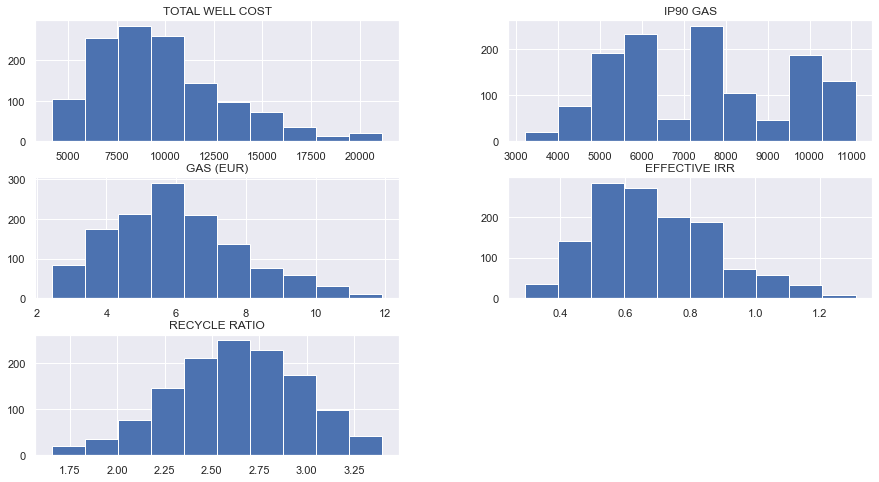

In [15]:
# Visualizing the histograms of the target

y.hist(figsize=(15,8))

# 4. Splitting Features and Targets

In [16]:
# Splitting the identified features and targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)

# 5. Data Pre-processing

### This section is only applied to the training dataset

## 5.1. Outlier Detection

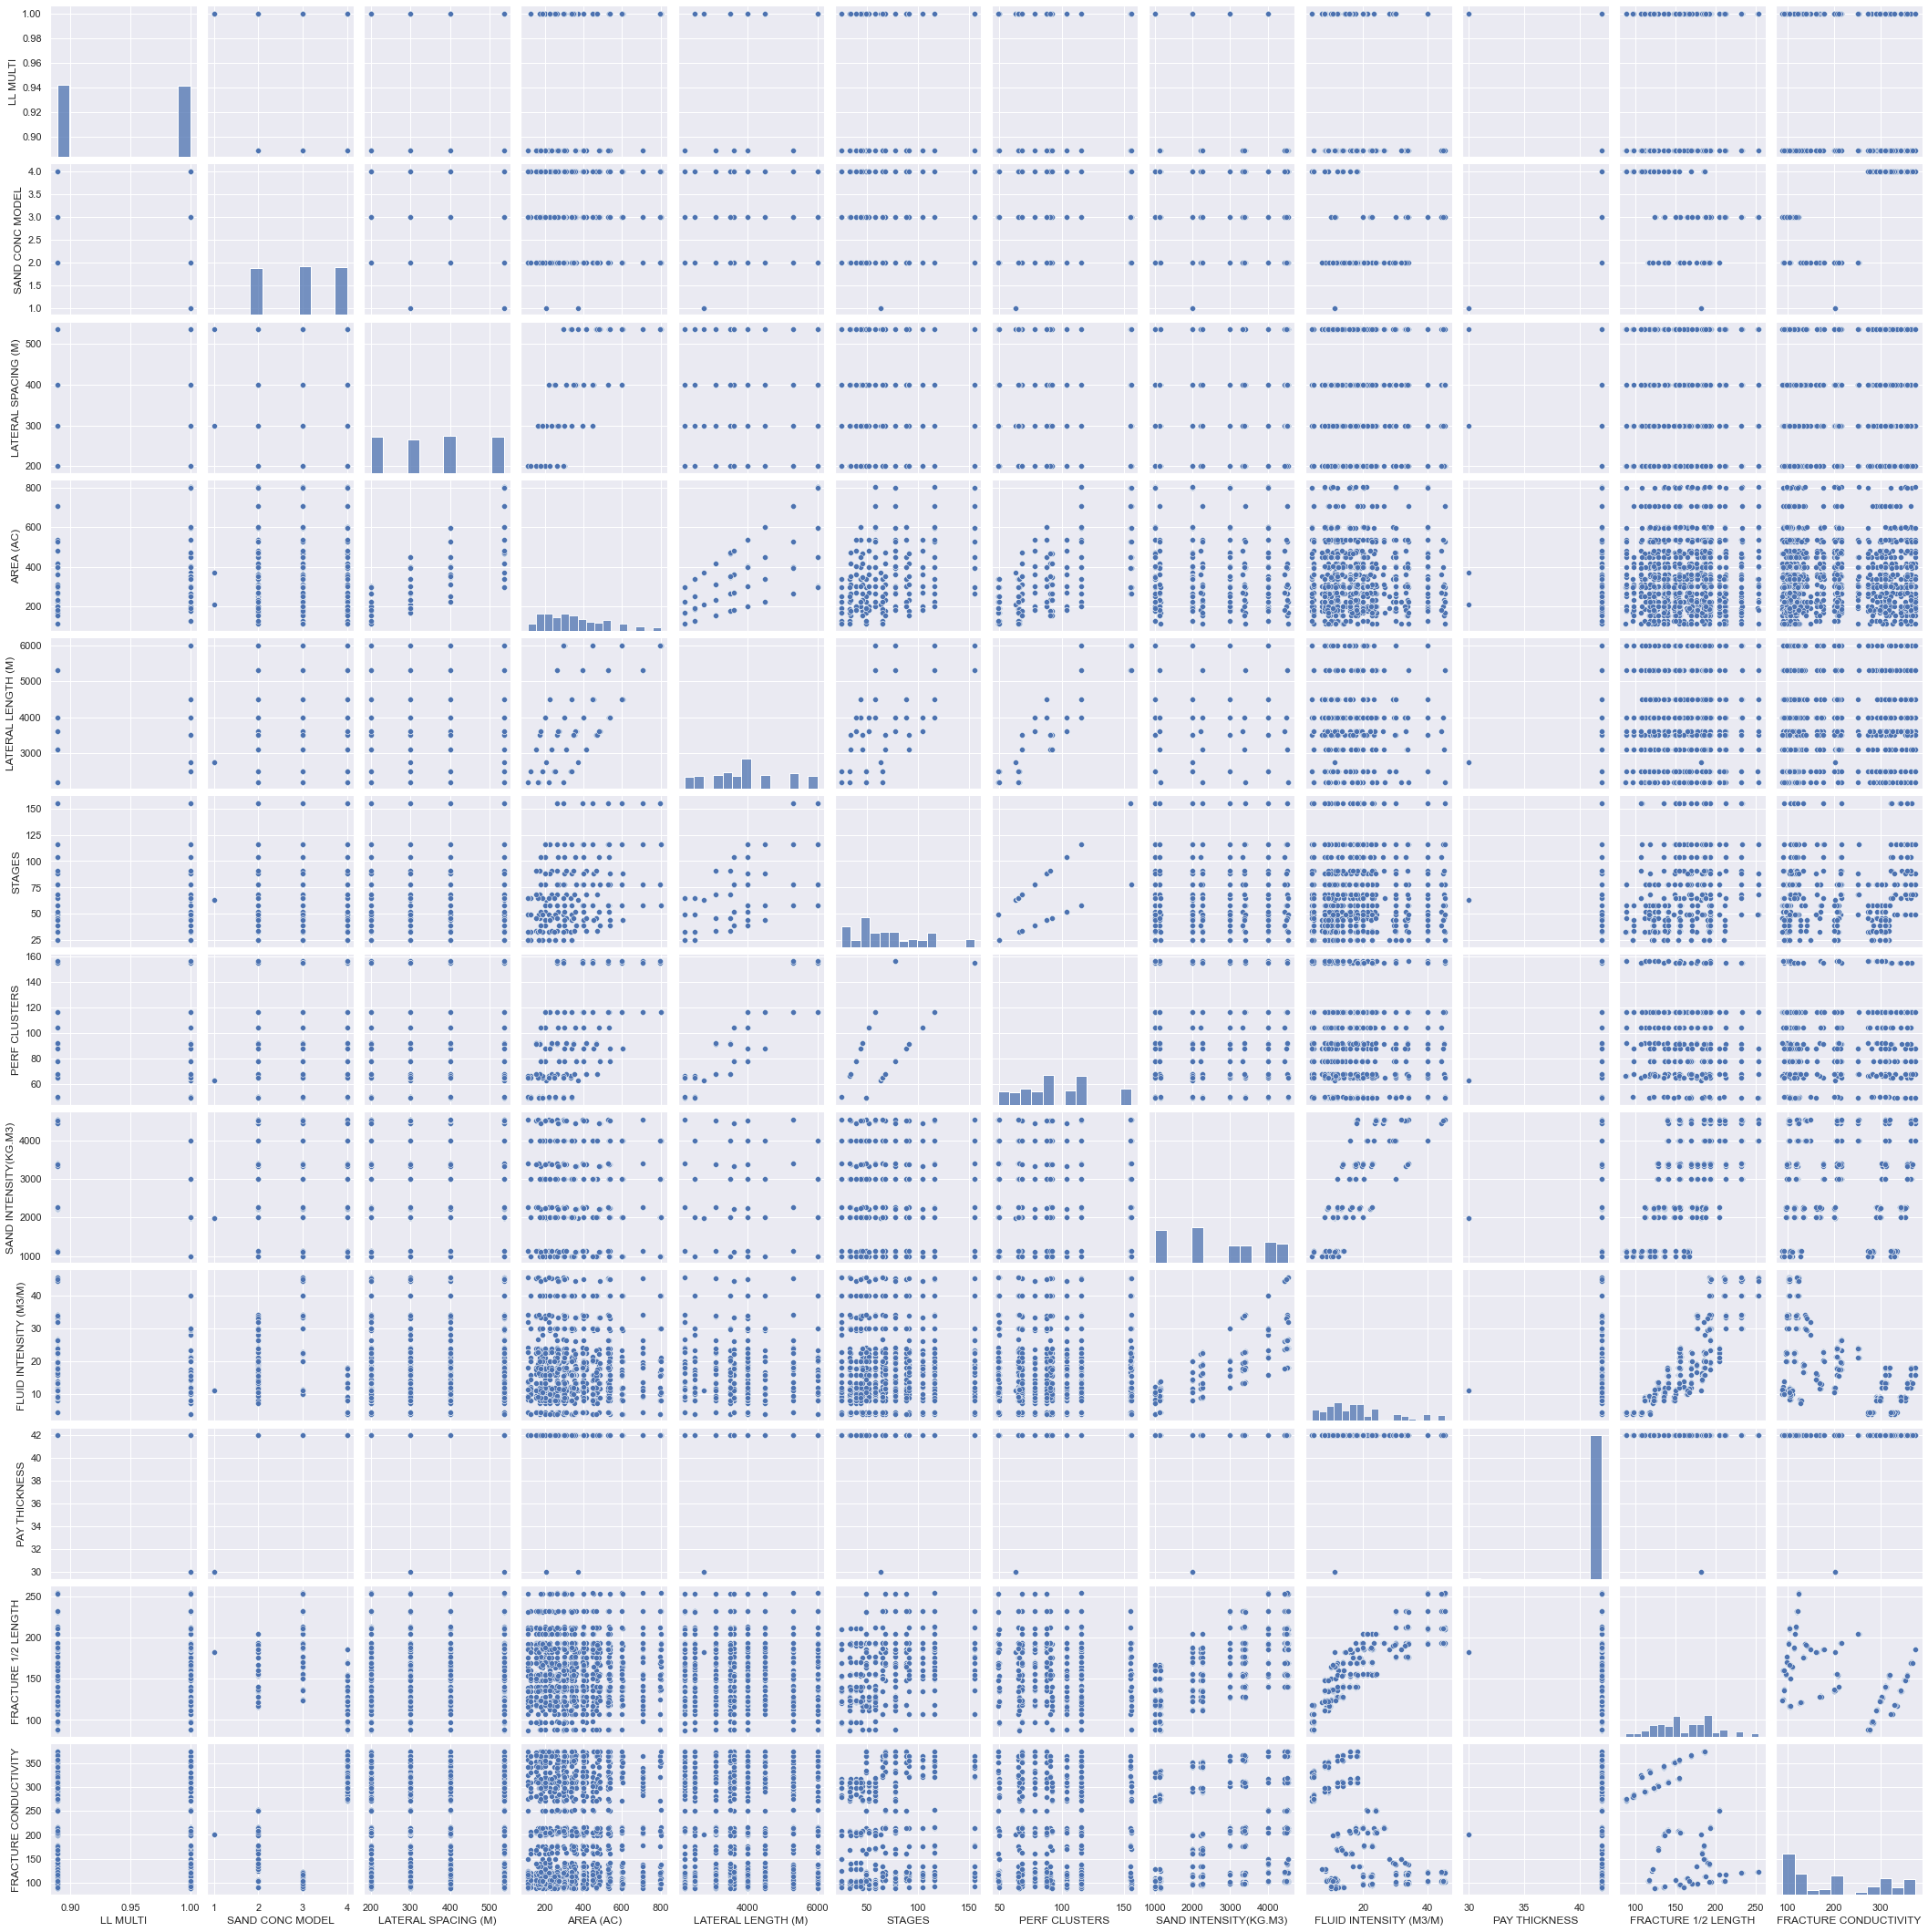

In [17]:
# Visualizing the feature dataset before outliers removal using cross-plot
sns.pairplot(X_train)

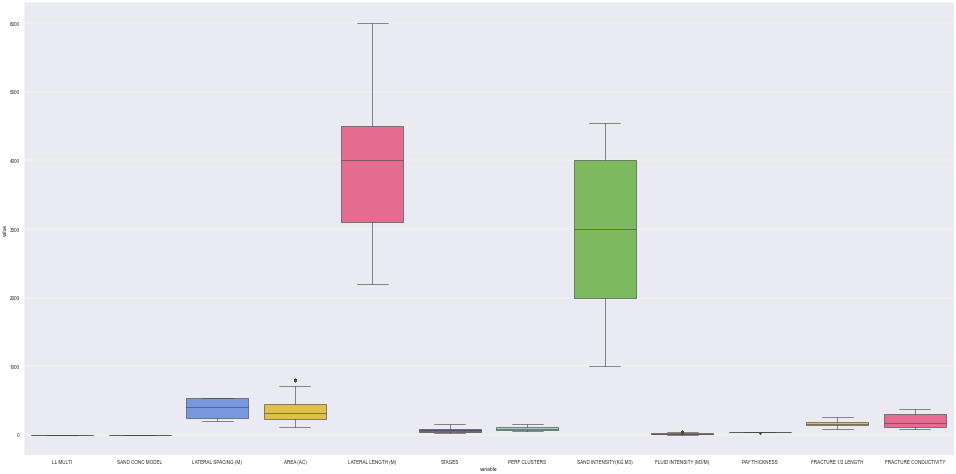

In [18]:
# Plotting the box plots for the training dataset before outliers removal
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize = (40,20),dpi=30)
sns.boxplot(x="variable", y="value",data=pd.melt(X_train),palette=colors)
plt.show()

In [19]:
# Applying isolation forest to detect outliers (Assuming 5% contamination)
iforest = IsolationForest(n_estimators=500, contamination=0.05)
iforest.fit(X_train)

IsolationForest(contamination=0.05, n_estimators=500)

In [20]:
# Removing the outliers from the training and testing dataset
X_train_i = X_train[iforest.predict(X_train)==1]
y_train_i = y_train[iforest.predict(X_train)==1]
X_test_i = X_test[iforest.predict(X_test)==1]
y_test_i = y_test[iforest.predict(X_test)==1]

In [21]:
# Number of Outliers
np.shape(X_train)[0] - np.shape(X_train_i)[0]

49

## 5.2. Data Scaling

In [22]:
# Robust scalar training
rscaler = RobustScaler()
rscaler.fit(X_train_i)

RobustScaler()

In [23]:
# Transforming the training and testing dataset using Robust Scalar
X_train_s = pd.DataFrame(rscaler.transform(X_train_i),columns=X_train_i.columns)
X_test_s  = pd.DataFrame(rscaler.transform(X_test_i),columns=X_test_i.columns)

In [24]:
# Showing the descriptive statistics of the scaled training dataset
X_train_s.describe()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)   AREA (AC)  \
count  914.000000       914.000000           914.000000  914.000000   
mean     0.492341        -0.006565            -0.240625    0.142650   
std      0.500215         0.407300             0.701842    0.669877   
min      0.000000        -1.000000            -1.142857   -0.894338   
25%      0.000000        -0.500000            -1.000000   -0.386536   
50%      0.000000         0.000000             0.000000    0.000000   
75%      1.000000         0.500000             0.000000    0.613464   
max      1.000000         0.500000             0.777143    2.187249   

       LATERAL LENGTH (M)      STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
count          914.000000  914.000000     914.000000             914.000000   
mean             0.169936    0.228367       0.091152              -0.137145   
std              0.737852    0.684960       0.579746               0.592187   
min             -1.000000   -0.750000      -0.812500              -1.000000   
25%             -0.357143   -0.318182      -0.416667              -0.500000   
50%              0.000000    0.000000       0.000000               0.000000   
75%              0.642857    0.681818       0.583333               0.500000   
max              1.714286    2.204545       1.416667               0.772750   

       FLUID INTENSITY (M3/M)  PAY THICKNESS  FRACTURE 1/2 LENGTH  \
count              914.000000     914.000000         9.140000e+02   
mean                 0.209045      -0.013129         4.355969e-02   
std                  0.908817       0.396925         7.010802e-01   
min                 -1.061947     -12.000000        -1.437969e+00   
25%                 -0.415929       0.000000        -4.809051e-01   
50%                  0.000000       0.000000        -2.797242e-16   
75%                  0.584071       0.000000         5.190949e-01   
max                  2.610619       0.000000         1.836120e+00   

       FRACTURE CONDUCTIVITY  
count             914.000000  
mean                0.124861  
std                 0.504740  
min                -0.456262  
25%                -0.352556  
50%                 0.000000  
75%                 0.647444  
max                 1.032540

In [25]:
# Showing the descriptive statistics of the scaled testing dataset
X_test_s.describe()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)   AREA (AC)  \
count  306.000000       306.000000           306.000000  306.000000   
mean     0.526144         0.001634            -0.324482    0.053593   
std      0.500134         0.399792             0.674108    0.595185   
min      0.000000        -0.500000            -1.142857   -0.894338   
25%      0.000000        -0.500000            -1.142857   -0.397236   
50%      1.000000         0.000000            -0.571429   -0.053054   
75%      1.000000         0.500000             0.000000    0.399019   
max      1.000000         0.500000             0.777143    2.187249   

       LATERAL LENGTH (M)      STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
count          306.000000  306.000000     306.000000             306.000000   
mean             0.160831    0.202392       0.075368              -0.163550   
std              0.799377    0.680436       0.581315               0.583684   
min             -1.000000   -0.750000      -0.812500              -1.000000   
25%             -0.357143   -0.306818      -0.416667              -0.500000   
50%              0.000000    0.000000       0.000000               0.000000   
75%              0.642857    0.681818       0.583333               0.198100   
max              1.714286    2.204545       1.416667               0.772750   

       FLUID INTENSITY (M3/M)  PAY THICKNESS  FRACTURE 1/2 LENGTH  \
count              306.000000          306.0           306.000000   
mean                 0.184886            0.0             0.030685   
std                  0.890336            0.0             0.693844   
min                 -1.061947            0.0            -1.431312   
25%                 -0.486726            0.0            -0.485363   
50%                 -0.044248            0.0            -0.102127   
75%                  0.584071            0.0             0.572792   
max                  2.610619            0.0             1.836803   

       FRACTURE CONDUCTIVITY  
count             306.000000  
mean                0.104313  
std                 0.500867  
min                -0.456262  
25%                -0.366076  
50%                -0.040734  
75%                 0.637931  
max                 1.032540

### Both training and testing dataset are scaled and have a median (50th percentile) of zero and an interquartile range (75% percentile — 25% percentile) of one

## 5.3. Data Transformation

array([[<AxesSubplot:title={'center':'LL MULTI'}>,
        <AxesSubplot:title={'center':'SAND CONC MODEL'}>,
        <AxesSubplot:title={'center':'LATERAL SPACING (M)'}>],
       [<AxesSubplot:title={'center':'AREA (AC)'}>,
        <AxesSubplot:title={'center':'LATERAL LENGTH (M)'}>,
        <AxesSubplot:title={'center':'STAGES'}>],
       [<AxesSubplot:title={'center':'PERF CLUSTERS'}>,
        <AxesSubplot:title={'center':'SAND INTENSITY(KG.M3)'}>,
        <AxesSubplot:title={'center':'FLUID INTENSITY (M3/M)'}>],
       [<AxesSubplot:title={'center':'PAY THICKNESS'}>,
        <AxesSubplot:title={'center':'FRACTURE 1/2 LENGTH'}>,
        <AxesSubplot:title={'center':'FRACTURE CONDUCTIVITY'}>]],
      dtype=object)

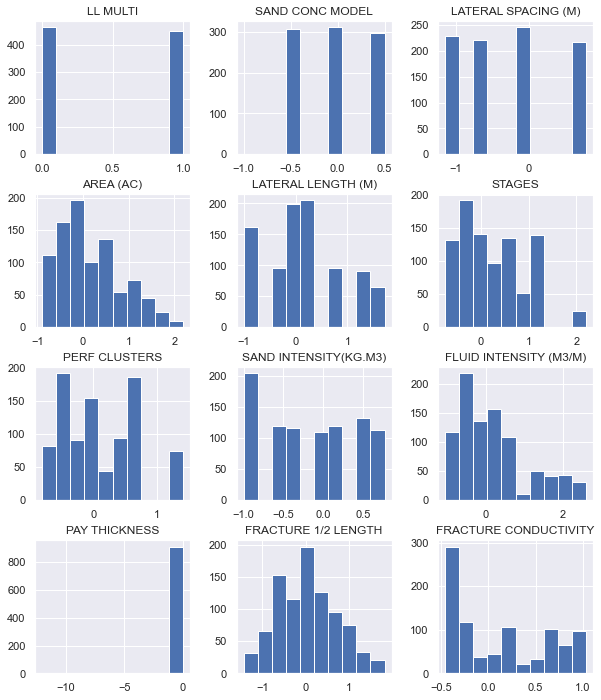

In [26]:
# Visualizing the histograms of the features before Power Transformer

X_train_s.hist(figsize=(10,12))

In [27]:
# Training Power Transformer
transformer = PowerTransformer()
transformer.fit(X_train_s)

PowerTransformer()

In [28]:
# Transforming both training and testing dataset with Power Transformer
X_train_st = pd.DataFrame(transformer.transform(X_train_s),columns=X_train_s.columns)
X_test_st  = pd.DataFrame(transformer.transform(X_test_s),columns=X_test_s.columns)

array([[<AxesSubplot:title={'center':'LL MULTI'}>,
        <AxesSubplot:title={'center':'SAND CONC MODEL'}>,
        <AxesSubplot:title={'center':'LATERAL SPACING (M)'}>],
       [<AxesSubplot:title={'center':'AREA (AC)'}>,
        <AxesSubplot:title={'center':'LATERAL LENGTH (M)'}>,
        <AxesSubplot:title={'center':'STAGES'}>],
       [<AxesSubplot:title={'center':'PERF CLUSTERS'}>,
        <AxesSubplot:title={'center':'SAND INTENSITY(KG.M3)'}>,
        <AxesSubplot:title={'center':'FLUID INTENSITY (M3/M)'}>],
       [<AxesSubplot:title={'center':'PAY THICKNESS'}>,
        <AxesSubplot:title={'center':'FRACTURE 1/2 LENGTH'}>,
        <AxesSubplot:title={'center':'FRACTURE CONDUCTIVITY'}>]],
      dtype=object)

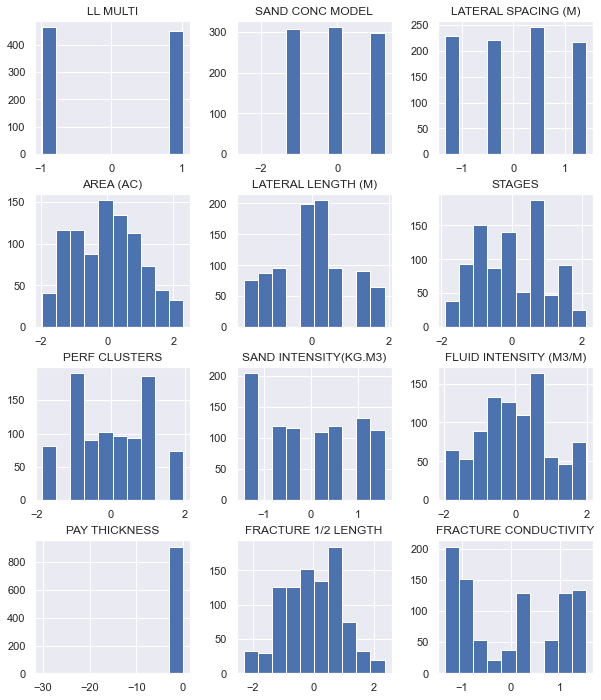

In [29]:
# Visualizing the histograms of the features after Power Transformer

X_train_st.hist(figsize=(10,12))

# 5.4. Collinearity of Features

<AxesSubplot:>

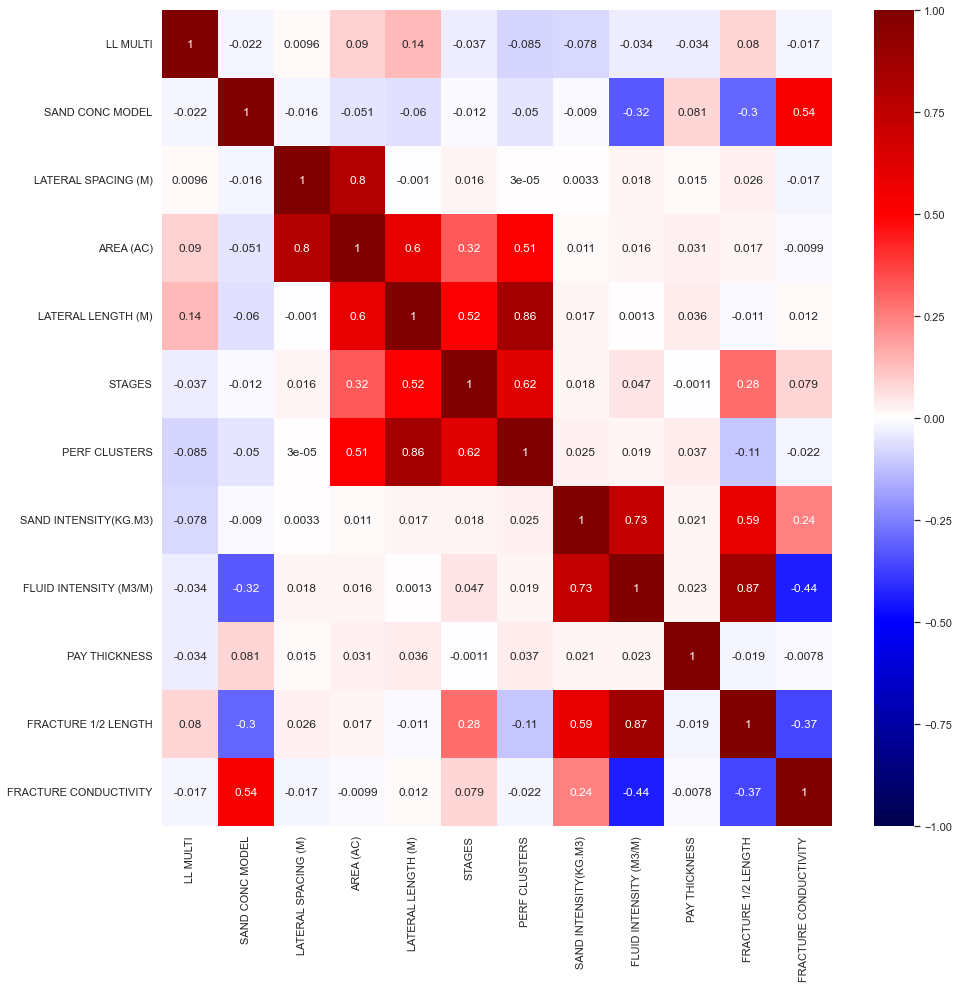

In [30]:
# calculate the correlation matrix to generate Pearson correlation map
corr_pearson = X_train_st.corr(method='pearson')

# plot Pearson correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns,center=0, vmin=-1, vmax=1, cmap='seismic', annot=True)

### In this analysis, a Pearson correlation of 0.85 and above was considered to be highly collinear features.

### Perforation clusters and fracture half-length are highly-correlated with lateral length and fluid intensity, respectively. However, they were kept intact due to their significance and importance in determining the performance of hydraulically fractured wells. 

### Instead, lateral length is removed since this parameter can be obtainined from number of stages and cluster spacing. Also, fluid intensity is removed since it can be related to fracture half-length and fracture conductivity along with proppant intensity.

In [31]:
# Removing the undesired features from both training and testing dataset

X_train_st = X_train_st.drop(['LATERAL LENGTH (M)','FLUID INTENSITY (M3/M)'], axis=1)
X_test_st = X_test_st.drop(['LATERAL LENGTH (M)','FLUID INTENSITY (M3/M)'], axis=1)

## 5.5. Quantity Association

### Using F-test and MI-test

In [32]:
# Creating dataframe that has the features for both F-test and MI-test
f_test = pd.DataFrame(index=X_train_st.columns)
mi_test = pd.DataFrame(index=X_train_st.columns)

In [33]:
# Applying both F-test and MI-test to the training dataset

for i in y_train.columns:
    # F-test Implementation
    f_test_n, _ = f_regression(X_train_st, y_train_i[i])
    f_test_n /= np.max(f_test_n) # F-value Normalization
    # MI-test Implementation
    mi_n = mutual_info_regression(X_train_st, y_train_i[i])
    mi_n /= np.max(mi_n) # MI-value Normalization
    # Filling the F-test and MI-test dataframes
    f_test[i]=f_test_n
    mi_test[i]=mi_n

In [34]:
# Demonstrating feature importance with F-test
f_test.max(axis=1)

LL MULTI                 0.026166
SAND CONC MODEL          0.033538
LATERAL SPACING (M)      0.248608
AREA (AC)                0.899572
STAGES                   0.402969
PERF CLUSTERS            1.000000
SAND INTENSITY(KG.M3)    1.000000
PAY THICKNESS            0.002921
FRACTURE 1/2 LENGTH      0.381808
FRACTURE CONDUCTIVITY    0.158317
dtype: float64

In [35]:
# Filtering the features based on a threshold of F-value = 0.1
f_test[f_test.max(axis=1)<.1].index.values

array(['LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

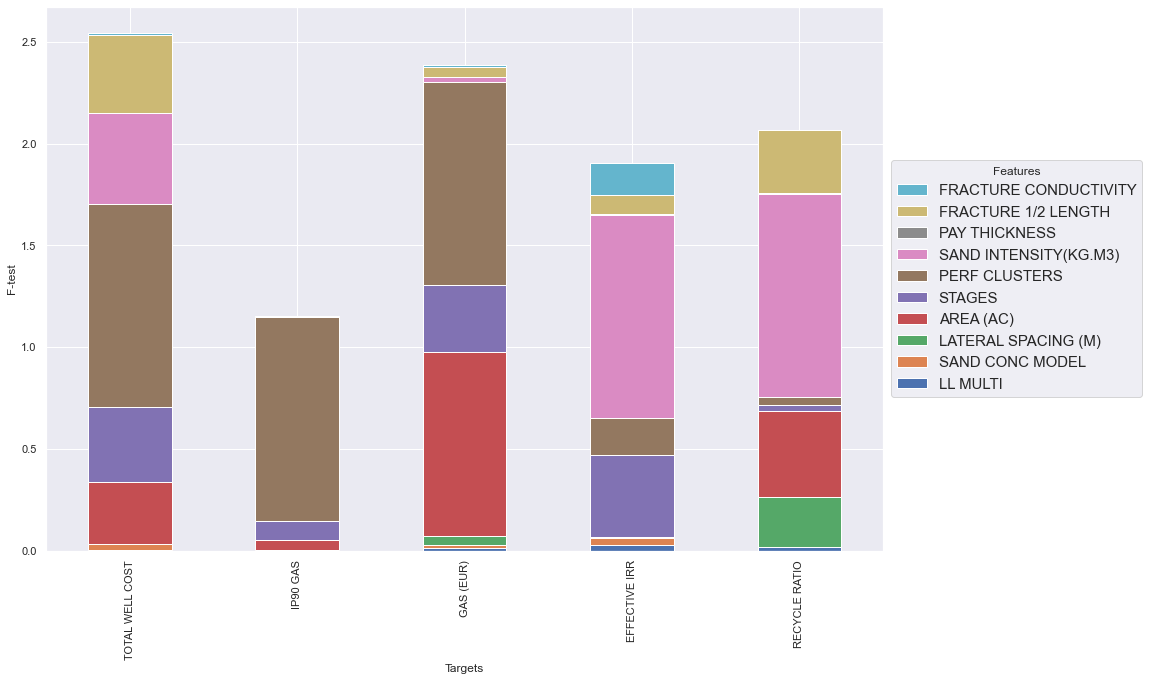

In [36]:
# Plotting feature importance based on F-test criteria
ax = f_test.T.plot.bar(stacked=True, figsize=(15,10))
plt.xlabel('Targets')
plt.ylabel('F-test')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Features', loc='center left', bbox_to_anchor=(1,.5),fontsize=15)
plt.show

In [37]:
# Demonstrating feature importance with MI-test
mi_test.max(axis=1)

LL MULTI                 0.195476
SAND CONC MODEL          0.269145
LATERAL SPACING (M)      0.380116
AREA (AC)                1.000000
STAGES                   0.757304
PERF CLUSTERS            0.836443
SAND INTENSITY(KG.M3)    1.000000
PAY THICKNESS            0.001055
FRACTURE 1/2 LENGTH      1.000000
FRACTURE CONDUCTIVITY    1.000000
dtype: float64

In [38]:
# Filtering the features based on a threshold of MI-value = 0.3
mi_test[mi_test.max(axis=1)<.3].index.values

array(['LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

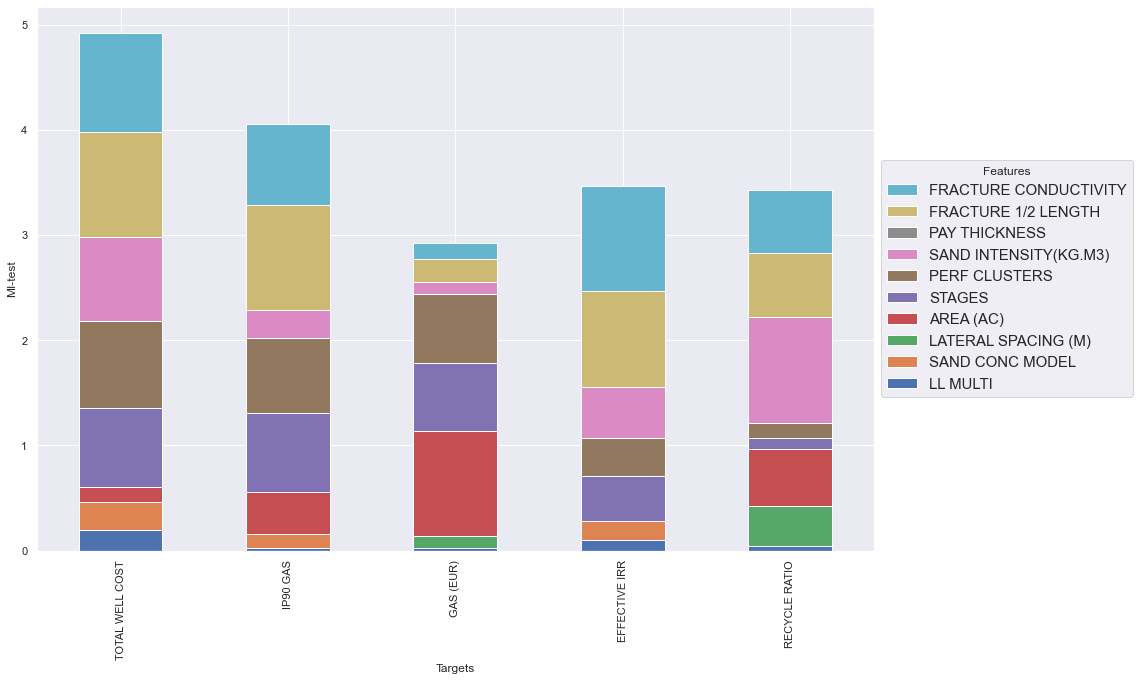

In [39]:
# Plotting feature importance based on MI-test criteria
ax = mi_test.T.plot.bar(stacked=True, figsize=(15,10))
plt.xlabel('Targets')
plt.ylabel('MI-test')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Features', loc='center left', bbox_to_anchor=(1,.5),fontsize=15)
plt.show

### From the above analysis of feature importance and based on the imposed criteria we made on the F-test and MI-test, we can conclude that our desired targets have very low quantity association with LL multi, sand concentration model, and pay thickness. And therefore, we can remove these features from the completion dataset.

In [40]:
# Removing the undesired features from both training and testing dataset

X_train_st = X_train_st.drop(['LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS'], axis=1)
X_test_st = X_test_st.drop(['LL MULTI', 'SAND CONC MODEL', 'PAY THICKNESS'], axis=1) 

# 5.6. Second Outlier Detection

In [41]:
# Applying isolation forest to detect outliers (Assuming 5% contamination)
iforest2 = IsolationForest(n_estimators=500, contamination=0.05)
iforest2.fit(X_train_st)

IsolationForest(contamination=0.05, n_estimators=500)

In [42]:
# Removing the outliers from the training and testing dataset
X_train_r = X_train_st[iforest2.predict(X_train_st)==1]
y_train_r = y_train_i[iforest2.predict(X_train_st)==1]
X_test_r = X_test_st[iforest2.predict(X_test_st)==1]
y_test_r = y_test_i[iforest2.predict(X_test_st)==1]

In [43]:
# Number of Outliers
np.shape(X_train_st)[0] - np.shape(X_train_r)[0]

46

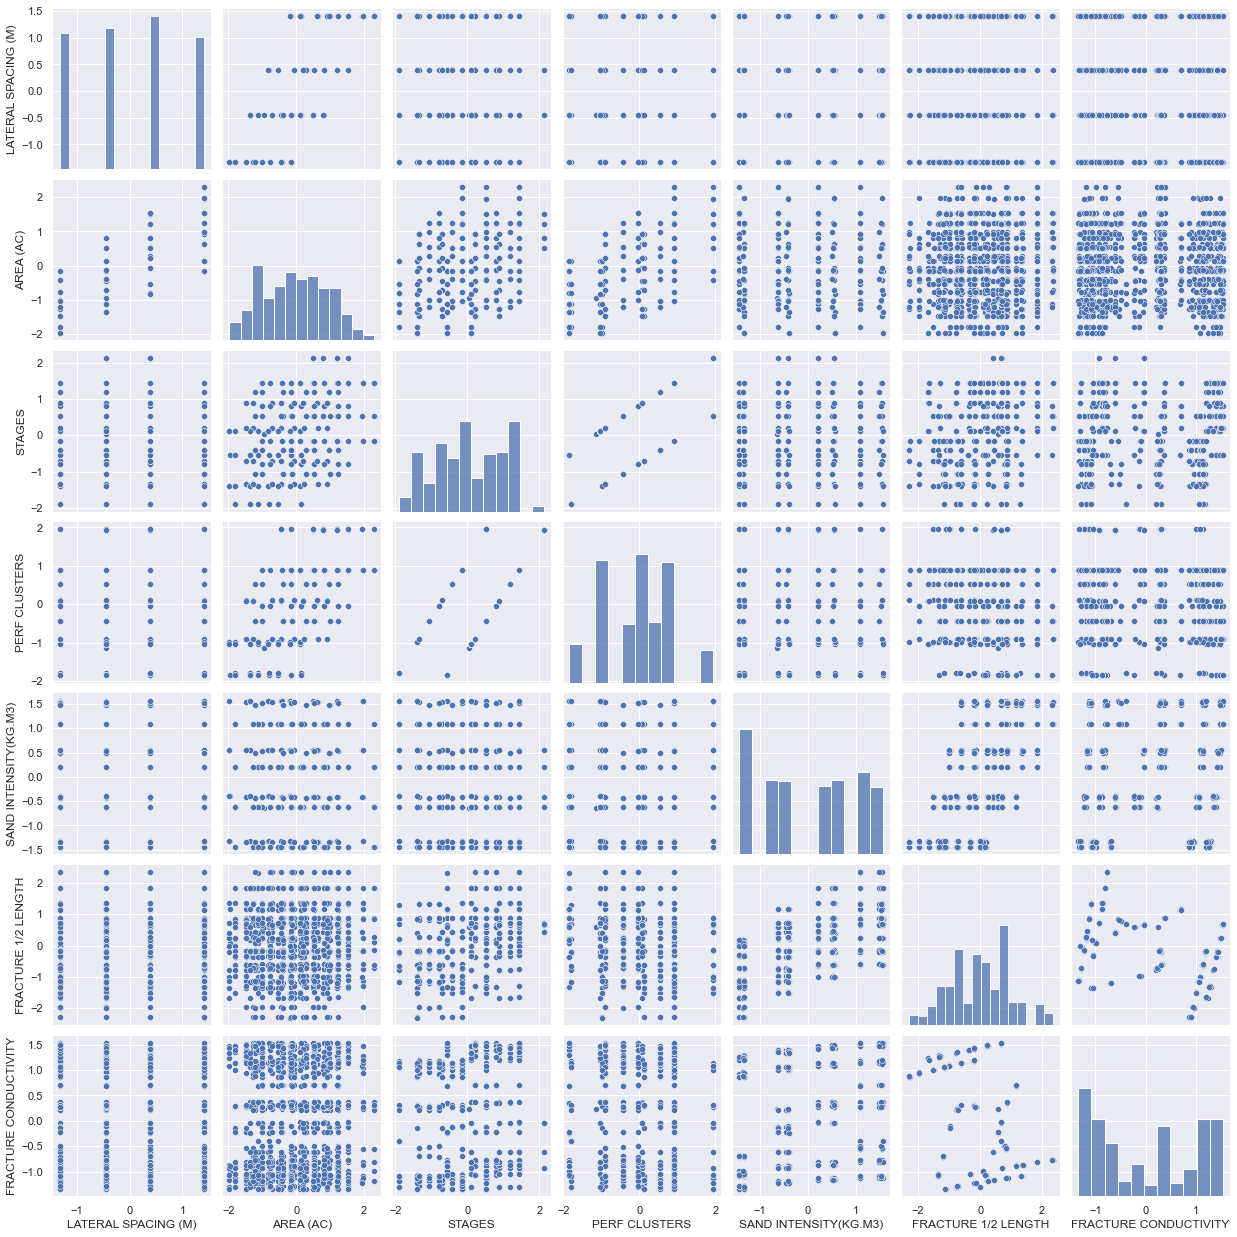

In [44]:
# Visualizing the feature dataset after outliers removal using cross-plot
sns.pairplot(X_train_r)

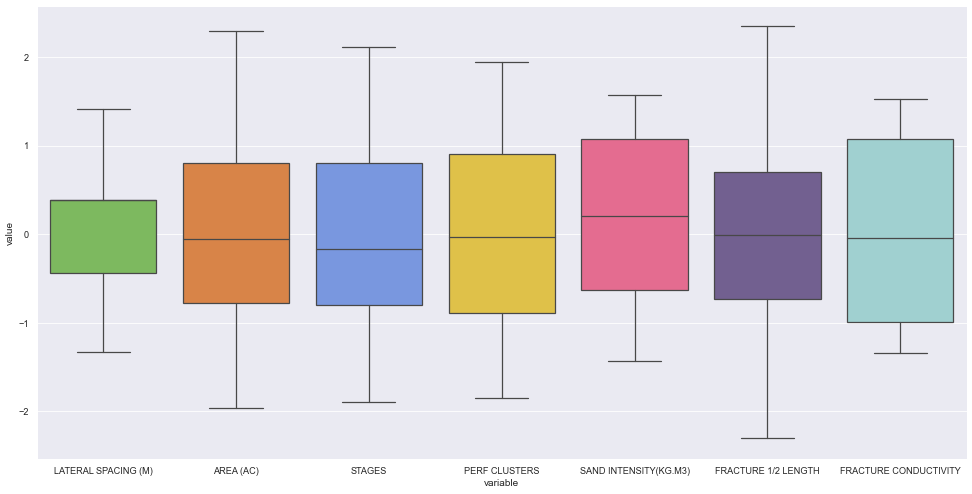

In [45]:
# Plotting the box plots for the training dataset after outliers removal
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize = (20,10),dpi=60)
sns.boxplot(x="variable", y="value",data=pd.melt(X_train_r),palette=colors)
plt.show()

## PCA will not be performed since it will alter the feature space, and they will lose their physical traits. Preserving the physical space of the features is important in this study to establish a direct and physically-meaningful relationship between the desired targets and features.

## It is very important and crucial for the completion engineers to indentify the optimum design parameters of the multistage hydraulic fracturing such as number of stages, perforation clusters, lateral spacing, and sand intensity (proppant concentration). These parameters have a direct and significant relationship to the well deliverables and economic metrics of hydraulically fractured wells in unconventional reservoirs.

## The established pre-processing workflow has reduced the number of features from 15 to 7 features that have direct relationships to the well deliverables and economic metrics.

# 6. Regression Models

## 6.1. Preliminary Procedures

In [46]:
# Instantiate the Kfold CrossValidation
cv1 = KFold(n_splits=4, shuffle = True, random_state=125)

In [47]:
# Instantiate the required regressors
en = ElasticNet()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
nn = MLPRegressor()

In [48]:
# Setting up R2 criteria dataframe to evaluate memorization performance
r2_mem = pd.DataFrame(index=y_train_r.columns.values, columns=['EN','SVR','RFR','GBR','NN'])

# Setting up R2 criteria dataframe to evaluate generalization performance
r2_gen = pd.DataFrame(index=y_test_r.columns.values, columns=['EN','SVR','RFR','GBR','NN'])

## 6.2. Elastic Net Regressor

In [49]:
# Performing hyperparameter optimization for the Elastic Net Regressor
param_grid1 = {'alpha': [0.001,0.01,0.1,1,10], 'l1_ratio': [0,0.2,0.4,0.6,0.8,1]}
grid1 = GridSearchCV(en, param_grid=param_grid1, cv=cv1, verbose=3)
grid1.fit(X_train_r, y_train_r)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END ...........alpha=0.001, l1_ratio=0;, score=0.918 total time=   0.0s
[CV 2/4] END ...........alpha=0.001, l1_ratio=0;, score=0.920 total time=   0.0s
[CV 3/4] END ...........alpha=0.001, l1_ratio=0;, score=0.923 total time=   0.0s
[CV 4/4] END ...........alpha=0.001, l1_ratio=0;, score=0.903 total time=   0.0s
[CV 1/4] END .........alpha=0.001, l1_ratio=0.2;, score=0.918 total time=   0.0s
[CV 2/4] END .........alpha=0.001, l1_ratio=0.2;, score=0.920 total time=   0.0s
[CV 3/4] END .........alpha=0.001, l1_ratio=0.2;, score=0.923 total time=   0.0s
[CV 4/4] END .........alpha=0.001, l1_ratio=0.2;, score=0.902 total time=   0.0s
[CV 1/4] END .........alpha=0.001, l1_ratio=0.4;, score=0.917 total time=   0.0s
[CV 2/4] END .........alpha=0.001, l1_ratio=0.4;, score=0.920 total time=   0.0s
[CV 3/4] END .........alpha=0.001, l1_ratio=0.4;, score=0.923 total time=   0.0s
[CV 4/4] END .........alpha=0.001, l1_ratio=0.4

GridSearchCV(cv=KFold(n_splits=4, random_state=125, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             verbose=3)

In [50]:
# Display top 8 EN models with their associated hyperparameters
Results1 = pd.DataFrame(grid1.cv_results_)
# generate a subset of the table
Results1_tiny = Results1[['param_alpha', 'param_l1_ratio', 'mean_test_score']]
# rank them based on cross-validation scores
Results1_tiny.sort_values(by='mean_test_score', ascending=False).head(8)

param_alpha param_l1_ratio  mean_test_score
0       0.001              0         0.915819
1       0.001            0.2         0.915724
2       0.001            0.4         0.915567
3       0.001            0.6         0.915342
4       0.001            0.8         0.915044
5       0.001              1         0.914662
6        0.01              0         0.913056
7        0.01            0.2         0.909760

In [51]:
# best/optimal hyperparameters of EN regressor
print(grid1.best_params_) 

{'alpha': 0.001, 'l1_ratio': 0}


In [52]:
# Applying the optimized EN regressor to predict the targets for the training dataset
y_pred_train1=pd.DataFrame(grid1.predict(X_train_r),columns=y_train_r.columns.values)
# Applying the optimized EN regressor to predict the targets for the testing dataset
y_pred_test1=pd.DataFrame(grid1.predict(X_test_r),columns=y_test_r.columns.values)

In [53]:
# Filling up the memorization and generalization performances of optimized EN regressor in R2 criteria dataframe
for i, columns in enumerate(y_train_r.columns):
    r2_mem.EN[i]=r2_score(y_train_r[columns],y_pred_train1[columns])
    r2_gen.EN[i]=r2_score(y_test_r[columns],y_pred_test1[columns])

In [54]:
# R2 scores for the memorization and generalization performances of the optimized EN regressor

pd.DataFrame({'EN_R2_mem': r2_mem['EN'], 'EN_R2_gen': r2_gen['EN']})

EN_R2_mem EN_R2_gen
TOTAL WELL COST  0.943167  0.938471
IP90 GAS         0.929456  0.930999
GAS (EUR)         0.96537   0.96588
EFFECTIVE IRR    0.866716  0.846639
RECYCLE RATIO    0.888654  0.903472

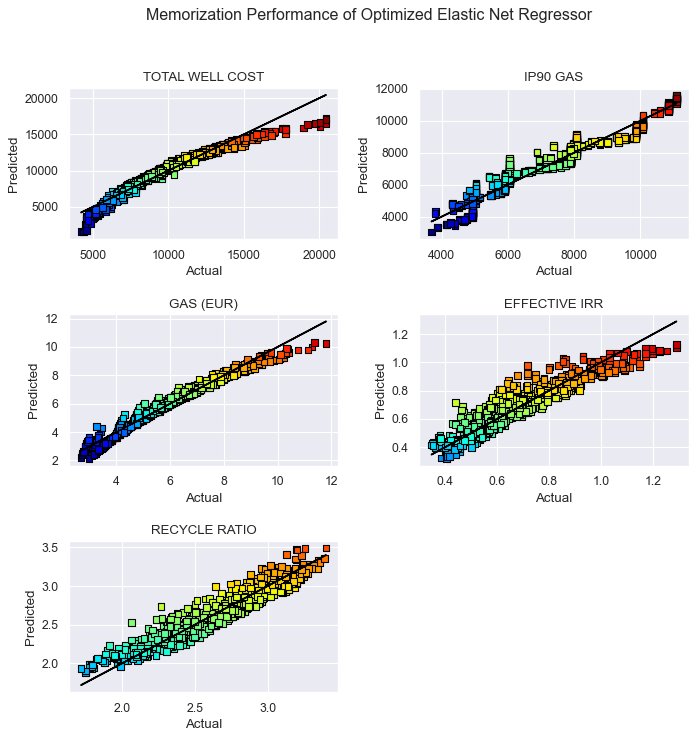

In [55]:
# Visualization of the memorization performance of the optimized EN regressor on training dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Memorization Performance of Optimized Elastic Net Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_train_r['TOTAL WELL COST'], y_pred_train1['TOTAL WELL COST'], c=y_pred_train1['TOTAL WELL COST'], vmin=int(y_pred_train1['TOTAL WELL COST'].min()), vmax=int(y_pred_train1['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_train_r['TOTAL WELL COST'], y_train_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_train_r['IP90 GAS'], y_pred_train1['IP90 GAS'], c=y_pred_train1['IP90 GAS'], vmin=int(y_pred_train1['IP90 GAS'].min()), vmax=int(y_pred_train1['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_train_r['IP90 GAS'], y_train_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_train_r['GAS (EUR)'], y_pred_train1['GAS (EUR)'], c=y_pred_train1['GAS (EUR)'], vmin=int(y_pred_train1['GAS (EUR)'].min()), vmax=int(y_pred_train1['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_train_r['GAS (EUR)'], y_train_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_train_r['EFFECTIVE IRR'], y_pred_train1['EFFECTIVE IRR'], c=y_pred_train1['EFFECTIVE IRR'], vmin=int(y_pred_train1['EFFECTIVE IRR'].min()), vmax=int(y_pred_train1['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_train_r['EFFECTIVE IRR'], y_train_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_train_r['RECYCLE RATIO'], y_pred_train1['RECYCLE RATIO'], c=y_pred_train1['RECYCLE RATIO'], vmin=int(y_pred_train1['RECYCLE RATIO'].min()), vmax=int(y_pred_train1['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_train_r['RECYCLE RATIO'], y_train_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

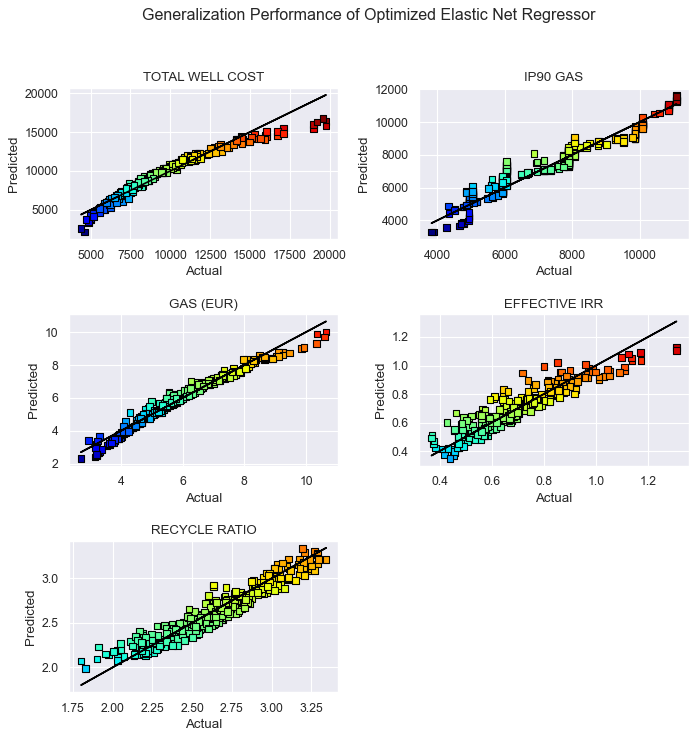

In [56]:
# Visualization of the generalization performance of the optimized EN regressor on testing dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Generalization Performance of Optimized Elastic Net Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_test_r['TOTAL WELL COST'], y_pred_test1['TOTAL WELL COST'], c=y_pred_test1['TOTAL WELL COST'], vmin=int(y_pred_test1['TOTAL WELL COST'].min()), vmax=int(y_pred_test1['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_test_r['TOTAL WELL COST'], y_test_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_test_r['IP90 GAS'], y_pred_test1['IP90 GAS'], c=y_pred_test1['IP90 GAS'], vmin=int(y_pred_test1['IP90 GAS'].min()), vmax=int(y_pred_test1['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_test_r['IP90 GAS'], y_test_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_test_r['GAS (EUR)'], y_pred_test1['GAS (EUR)'], c=y_pred_test1['GAS (EUR)'], vmin=int(y_pred_test1['GAS (EUR)'].min()), vmax=int(y_pred_test1['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_test_r['GAS (EUR)'], y_test_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_test_r['EFFECTIVE IRR'], y_pred_test1['EFFECTIVE IRR'], c=y_pred_test1['EFFECTIVE IRR'], vmin=int(y_pred_test1['EFFECTIVE IRR'].min()), vmax=int(y_pred_test1['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_test_r['EFFECTIVE IRR'], y_test_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_test_r['RECYCLE RATIO'], y_pred_test1['RECYCLE RATIO'], c=y_pred_test1['RECYCLE RATIO'], vmin=int(y_pred_test1['RECYCLE RATIO'].min()), vmax=int(y_pred_test1['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_test_r['RECYCLE RATIO'], y_test_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

## 6.3. Support Vector Regressor

In [57]:
# Performing hyperparameter optimization for the Support Vector Regressor
param_grid2 = {'estimator__kernel': ['linear','sigmoid','rbf'], 'estimator__C':[0.001,0.01,0.1,1,10,100], 'estimator__gamma':[0.1,0.5,1,5,10,15,20]}
grid2 = GridSearchCV(MultiOutputRegressor(svr), param_grid=param_grid2, cv=cv1, verbose=3)
grid2.fit(X_train_r, y_train_r)

Fitting 4 folds for each of 126 candidates, totalling 504 fits
[CV 1/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=linear;, score=0.394 total time=   0.0s
[CV 2/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=linear;, score=0.393 total time=   0.0s
[CV 3/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=linear;, score=0.416 total time=   0.0s
[CV 4/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=linear;, score=0.380 total time=   0.0s
[CV 1/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=sigmoid;, score=0.110 total time=   0.0s
[CV 2/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=sigmoid;, score=0.120 total time=   0.0s
[CV 3/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=sigmoid;, score=0.125 total time=   0.0s
[CV 4/4] END estimator__C=0.001, estimator__gamma=0.1, estimator__kernel=sigmoid;, score=0.114 total time=   0.0s
[CV 1/4] END estimator__C=0.0

[CV 1/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=sigmoid;, score=0.228 total time=   0.0s
[CV 2/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=sigmoid;, score=0.237 total time=   0.0s
[CV 3/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=sigmoid;, score=0.241 total time=   0.0s
[CV 4/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=sigmoid;, score=0.230 total time=   0.0s
[CV 1/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=rbf;, score=-0.026 total time=   0.0s
[CV 2/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=rbf;, score=-0.018 total time=   0.0s
[CV 3/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=rbf;, score=-0.013 total time=   0.0s
[CV 4/4] END estimator__C=0.001, estimator__gamma=20, estimator__kernel=rbf;, score=-0.020 total time=   0.0s
[CV 1/4] END estimator__C=0.01, estimator__gamma=0.1, estimator__kernel=linear;, score=0.515 total time=   0

[CV 3/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=sigmoid;, score=-2.350 total time=   0.0s
[CV 4/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=sigmoid;, score=-2.803 total time=   0.0s
[CV 1/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=rbf;, score=-0.022 total time=   0.1s
[CV 2/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=rbf;, score=-0.016 total time=   0.0s
[CV 3/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=rbf;, score=-0.010 total time=   0.1s
[CV 4/4] END estimator__C=0.01, estimator__gamma=15, estimator__kernel=rbf;, score=-0.017 total time=   0.0s
[CV 1/4] END estimator__C=0.01, estimator__gamma=20, estimator__kernel=linear;, score=0.515 total time=   0.0s
[CV 2/4] END estimator__C=0.01, estimator__gamma=20, estimator__kernel=linear;, score=0.508 total time=   0.0s
[CV 3/4] END estimator__C=0.01, estimator__gamma=20, estimator__kernel=linear;, score=0.523 total time=   0.0s
[CV 4

[CV 2/4] END estimator__C=0.1, estimator__gamma=10, estimator__kernel=rbf;, score=0.020 total time=   0.1s
[CV 3/4] END estimator__C=0.1, estimator__gamma=10, estimator__kernel=rbf;, score=0.021 total time=   0.1s
[CV 4/4] END estimator__C=0.1, estimator__gamma=10, estimator__kernel=rbf;, score=0.016 total time=   0.1s
[CV 1/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=linear;, score=0.556 total time=   0.0s
[CV 2/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=linear;, score=0.543 total time=   0.0s
[CV 3/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=linear;, score=0.558 total time=   0.0s
[CV 4/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=linear;, score=0.537 total time=   0.0s
[CV 1/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=sigmoid;, score=-284.427 total time=   0.0s
[CV 2/4] END estimator__C=0.1, estimator__gamma=15, estimator__kernel=sigmoid;, score=-363.137 total time=   0.1s
[CV 3/4] EN

[CV 3/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=linear;, score=0.725 total time=   0.1s
[CV 4/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=linear;, score=0.709 total time=   0.1s
[CV 1/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=sigmoid;, score=-24879.547 total time=   0.1s
[CV 2/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=sigmoid;, score=-32502.602 total time=   0.1s
[CV 3/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=sigmoid;, score=-30196.767 total time=   0.1s
[CV 4/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=sigmoid;, score=-29500.126 total time=   0.1s
[CV 1/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=rbf;, score=0.076 total time=   0.1s
[CV 2/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=rbf;, score=0.068 total time=   0.1s
[CV 3/4] END estimator__C=1, estimator__gamma=10, estimator__kernel=rbf;, score=0.069 total time=   0.1s
[CV 4/4] END 

[CV 2/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=sigmoid;, score=-3933988.796 total time=   0.1s
[CV 3/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=sigmoid;, score=-3217169.176 total time=   0.1s
[CV 4/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=sigmoid;, score=-3314624.267 total time=   0.1s
[CV 1/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=rbf;, score=0.195 total time=   0.1s
[CV 2/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=rbf;, score=0.190 total time=   0.1s
[CV 3/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=rbf;, score=0.185 total time=   0.1s
[CV 4/4] END estimator__C=10, estimator__gamma=5, estimator__kernel=rbf;, score=0.189 total time=   0.1s
[CV 1/4] END estimator__C=10, estimator__gamma=10, estimator__kernel=linear;, score=0.893 total time=   0.5s
[CV 2/4] END estimator__C=10, estimator__gamma=10, estimator__kernel=linear;, score=0.900 total time=   0.5s
[CV 3/4] END e

[CV 4/4] END estimator__C=100, estimator__gamma=1, estimator__kernel=sigmoid;, score=-219647184.088 total time=   0.1s
[CV 1/4] END estimator__C=100, estimator__gamma=1, estimator__kernel=rbf;, score=0.567 total time=   0.0s
[CV 2/4] END estimator__C=100, estimator__gamma=1, estimator__kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/4] END estimator__C=100, estimator__gamma=1, estimator__kernel=rbf;, score=0.587 total time=   0.0s
[CV 4/4] END estimator__C=100, estimator__gamma=1, estimator__kernel=rbf;, score=0.576 total time=   0.0s
[CV 1/4] END estimator__C=100, estimator__gamma=5, estimator__kernel=linear;, score=0.911 total time=   3.7s
[CV 2/4] END estimator__C=100, estimator__gamma=5, estimator__kernel=linear;, score=0.913 total time=   3.9s
[CV 3/4] END estimator__C=100, estimator__gamma=5, estimator__kernel=linear;, score=0.917 total time=   3.8s
[CV 4/4] END estimator__C=100, estimator__gamma=5, estimator__kernel=linear;, score=0.900 total time=   3.8s
[CV 1/4] END estimato

GridSearchCV(cv=KFold(n_splits=4, random_state=125, shuffle=True),
             estimator=MultiOutputRegressor(estimator=SVR()),
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'estimator__gamma': [0.1, 0.5, 1, 5, 10, 15, 20],
                         'estimator__kernel': ['linear', 'sigmoid', 'rbf']},
             verbose=3)

In [58]:
# Display top 8 SVR models with their associated hyperparameters
Results2 = pd.DataFrame(grid2.cv_results_)
# generate a subset of the table
Results2_tiny = Results2[['param_estimator__C','param_estimator__gamma','param_estimator__kernel','mean_test_score']]
# rank them based on cross-validation scores
Results2_tiny.sort_values(by='mean_test_score', ascending=False).head(8)

param_estimator__C param_estimator__gamma param_estimator__kernel  \
107                100                    0.1                     rbf   
105                100                    0.1                  linear   
114                100                      5                  linear   
111                100                      1                  linear   
108                100                    0.5                  linear   
117                100                     10                  linear   
120                100                     15                  linear   
123                100                     20                  linear   

     mean_test_score  
107         0.914235  
105         0.910313  
114         0.910313  
111         0.910313  
108         0.910313  
117         0.910313  
120         0.910313  
123         0.910313

In [59]:
# best/optimal hyperparameters of SVR regressor
print(grid2.best_params_)

{'estimator__C': 100, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}


In [60]:
# Applying the optimized SVR regressor to predict the targets for the training dataset
y_pred_train2=pd.DataFrame(grid2.predict(X_train_r),columns=y_train_r.columns.values)
# Applying the optimized SVR regressor to predict the targets for the testing dataset
y_pred_test2=pd.DataFrame(grid2.predict(X_test_r),columns=y_test_r.columns.values)

In [61]:
# Filling up the memorization and generalization performances of optimized SVR regressor in R2 criteria dataframe
for i, columns in enumerate(y_train_r.columns):
    r2_mem.SVR[i]=r2_score(y_train_r[columns],y_pred_train2[columns])
    r2_gen.SVR[i]=r2_score(y_test_r[columns],y_pred_test2[columns])

In [62]:
# R2 scores for the memorization and generalization performances of the optimized SVR regressor

pd.DataFrame({'SVR_R2_mem': r2_mem['SVR'], 'SVR_R2_gen': r2_gen['SVR']})

SVR_R2_mem SVR_R2_gen
TOTAL WELL COST   0.834023   0.819244
IP90 GAS           0.94036   0.939741
GAS (EUR)         0.998541   0.998281
EFFECTIVE IRR     0.926389   0.910081
RECYCLE RATIO     0.972444   0.969369

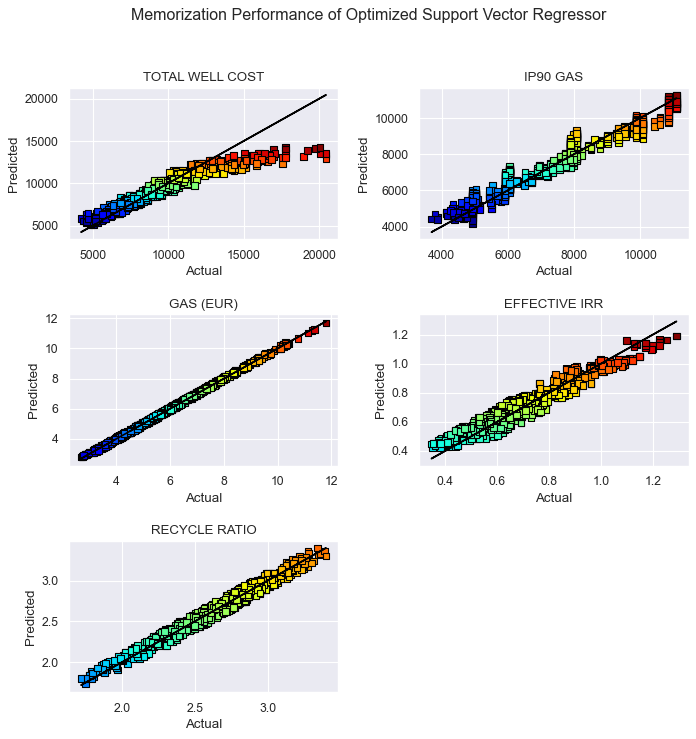

In [63]:
# Visualization of the memorization performance of the optimized SVR regressor on training dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Memorization Performance of Optimized Support Vector Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_train_r['TOTAL WELL COST'], y_pred_train2['TOTAL WELL COST'], c=y_pred_train2['TOTAL WELL COST'], vmin=int(y_pred_train2['TOTAL WELL COST'].min()), vmax=int(y_pred_train2['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_train_r['TOTAL WELL COST'], y_train_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_train_r['IP90 GAS'], y_pred_train2['IP90 GAS'], c=y_pred_train2['IP90 GAS'], vmin=int(y_pred_train2['IP90 GAS'].min()), vmax=int(y_pred_train2['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_train_r['IP90 GAS'], y_train_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_train_r['GAS (EUR)'], y_pred_train2['GAS (EUR)'], c=y_pred_train2['GAS (EUR)'], vmin=int(y_pred_train2['GAS (EUR)'].min()), vmax=int(y_pred_train2['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_train_r['GAS (EUR)'], y_train_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_train_r['EFFECTIVE IRR'], y_pred_train2['EFFECTIVE IRR'], c=y_pred_train2['EFFECTIVE IRR'], vmin=int(y_pred_train2['EFFECTIVE IRR'].min()), vmax=int(y_pred_train2['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_train_r['EFFECTIVE IRR'], y_train_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_train_r['RECYCLE RATIO'], y_pred_train2['RECYCLE RATIO'], c=y_pred_train2['RECYCLE RATIO'], vmin=int(y_pred_train2['RECYCLE RATIO'].min()), vmax=int(y_pred_train2['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_train_r['RECYCLE RATIO'], y_train_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

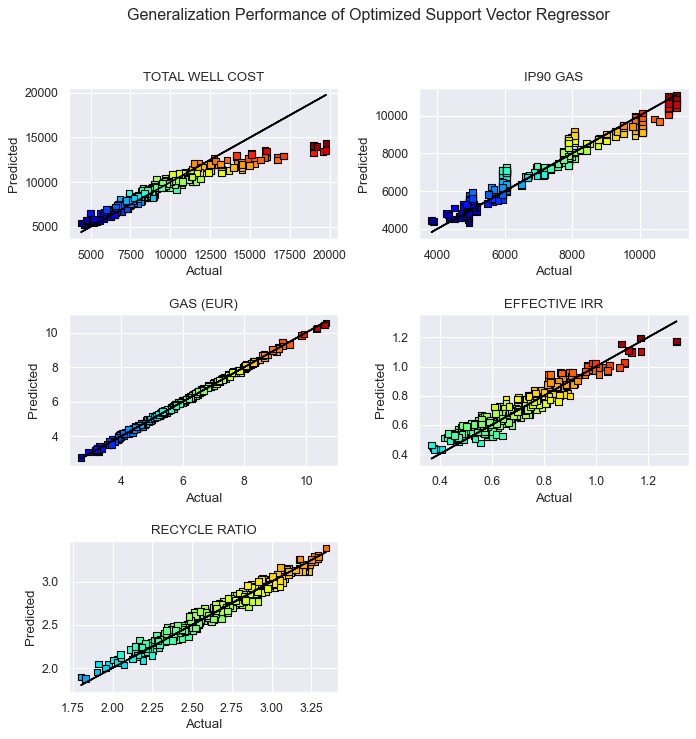

In [64]:
# Visualization of the generalization performance of the optimized SVR regressor on testing dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Generalization Performance of Optimized Support Vector Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_test_r['TOTAL WELL COST'], y_pred_test2['TOTAL WELL COST'], c=y_pred_test2['TOTAL WELL COST'], vmin=int(y_pred_test2['TOTAL WELL COST'].min()), vmax=int(y_pred_test2['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_test_r['TOTAL WELL COST'], y_test_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_test_r['IP90 GAS'], y_pred_test2['IP90 GAS'], c=y_pred_test2['IP90 GAS'], vmin=int(y_pred_test2['IP90 GAS'].min()), vmax=int(y_pred_test2['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_test_r['IP90 GAS'], y_test_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_test_r['GAS (EUR)'], y_pred_test2['GAS (EUR)'], c=y_pred_test2['GAS (EUR)'], vmin=int(y_pred_test2['GAS (EUR)'].min()), vmax=int(y_pred_test2['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_test_r['GAS (EUR)'], y_test_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_test_r['EFFECTIVE IRR'], y_pred_test2['EFFECTIVE IRR'], c=y_pred_test2['EFFECTIVE IRR'], vmin=int(y_pred_test2['EFFECTIVE IRR'].min()), vmax=int(y_pred_test2['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_test_r['EFFECTIVE IRR'], y_test_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_test_r['RECYCLE RATIO'], y_pred_test2['RECYCLE RATIO'], c=y_pred_test2['RECYCLE RATIO'], vmin=int(y_pred_test2['RECYCLE RATIO'].min()), vmax=int(y_pred_test2['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_test_r['RECYCLE RATIO'], y_test_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

## 6.4. Random Forest Regressor

In [65]:
# Performing hyperparameter optimization for the Random Forest Regressor
param_grid3 = {'min_samples_leaf':[1,3,5], 'max_depth':[2,4,6,8], 'max_features':[2,3,4,5], 'n_estimators':[50,100,150,200,250]}
grid3 = GridSearchCV(rfr, param_grid=param_grid3, cv=cv1, verbose=3)
grid3.fit(X_train_r, y_train_r)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
[CV 1/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=50;, score=0.512 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=50;, score=0.514 total time=   0.0s
[CV 3/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=50;, score=0.512 total time=   0.0s
[CV 4/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=50;, score=0.528 total time=   0.0s
[CV 1/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.535 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.525 total time=   0.0s
[CV 3/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.535 total time=   0.0s
[CV 4/4] END max_depth=2, max_features=2, min_samples_leaf=1, n_estimators=100;, score=0.516 total time=   0.0s
[CV 1/4] END max_depth=2, max_features=2, min

[CV 2/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=200;, score=0.558 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=200;, score=0.555 total time=   0.1s
[CV 4/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=200;, score=0.550 total time=   0.1s
[CV 1/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=250;, score=0.557 total time=   0.1s
[CV 2/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=250;, score=0.560 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=250;, score=0.555 total time=   0.1s
[CV 4/4] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=250;, score=0.541 total time=   0.1s
[CV 1/4] END max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=50;, score=0.553 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=3, min_samples_leaf=3, n_estimators=50;, score=0.555 total time=  

[CV 1/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=150;, score=0.565 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=150;, score=0.570 total time=   0.0s
[CV 3/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=150;, score=0.566 total time=   0.0s
[CV 4/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=150;, score=0.574 total time=   0.0s
[CV 1/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=200;, score=0.569 total time=   0.1s
[CV 2/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=200;, score=0.582 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=200;, score=0.560 total time=   0.1s
[CV 4/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=200;, score=0.566 total time=   0.1s
[CV 1/4] END max_depth=2, max_features=4, min_samples_leaf=3, n_estimators=250;, score=0.564 total time=

[CV 1/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=100;, score=0.570 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=100;, score=0.576 total time=   0.0s
[CV 3/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=100;, score=0.560 total time=   0.0s
[CV 4/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=100;, score=0.561 total time=   0.0s
[CV 1/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=150;, score=0.568 total time=   0.0s
[CV 2/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=150;, score=0.582 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=150;, score=0.554 total time=   0.0s
[CV 4/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=150;, score=0.571 total time=   0.0s
[CV 1/4] END max_depth=2, max_features=5, min_samples_leaf=5, n_estimators=200;, score=0.569 total time=

[CV 4/4] END max_depth=4, max_features=2, min_samples_leaf=5, n_estimators=250;, score=0.731 total time=   0.1s
[CV 1/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=50;, score=0.741 total time=   0.0s
[CV 2/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=50;, score=0.751 total time=   0.0s
[CV 3/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=50;, score=0.733 total time=   0.0s
[CV 4/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=50;, score=0.744 total time=   0.0s
[CV 1/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.741 total time=   0.0s
[CV 2/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.750 total time=   0.0s
[CV 3/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.742 total time=   0.0s
[CV 4/4] END max_depth=4, max_features=3, min_samples_leaf=1, n_estimators=100;, score=0.745 total time=   0

[CV 2/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=200;, score=0.751 total time=   0.1s
[CV 3/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=200;, score=0.733 total time=   0.1s
[CV 4/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=200;, score=0.738 total time=   0.1s
[CV 1/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=250;, score=0.741 total time=   0.1s
[CV 2/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=250;, score=0.748 total time=   0.2s
[CV 3/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=250;, score=0.735 total time=   0.1s
[CV 4/4] END max_depth=4, max_features=4, min_samples_leaf=1, n_estimators=250;, score=0.739 total time=   0.1s
[CV 1/4] END max_depth=4, max_features=4, min_samples_leaf=3, n_estimators=50;, score=0.741 total time=   0.0s
[CV 2/4] END max_depth=4, max_features=4, min_samples_leaf=3, n_estimators=50;, score=0.749 total time=  

[CV 1/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=150;, score=0.733 total time=   0.1s
[CV 2/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=150;, score=0.749 total time=   0.1s
[CV 3/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=150;, score=0.728 total time=   0.1s
[CV 4/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=150;, score=0.732 total time=   0.0s
[CV 1/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=200;, score=0.736 total time=   0.1s
[CV 2/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=200;, score=0.746 total time=   0.1s
[CV 3/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=200;, score=0.725 total time=   0.1s
[CV 4/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=200;, score=0.732 total time=   0.1s
[CV 1/4] END max_depth=4, max_features=5, min_samples_leaf=3, n_estimators=250;, score=0.736 total time=

[CV 1/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=100;, score=0.816 total time=   0.0s
[CV 2/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=100;, score=0.826 total time=   0.0s
[CV 3/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=100;, score=0.827 total time=   0.0s
[CV 4/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=100;, score=0.819 total time=   0.0s
[CV 1/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=150;, score=0.822 total time=   0.0s
[CV 2/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=150;, score=0.830 total time=   0.0s
[CV 3/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=150;, score=0.824 total time=   0.0s
[CV 4/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=150;, score=0.821 total time=   0.0s
[CV 1/4] END max_depth=6, max_features=2, min_samples_leaf=5, n_estimators=200;, score=0.820 total time=

[CV 3/4] END max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=250;, score=0.823 total time=   0.1s
[CV 4/4] END max_depth=6, max_features=3, min_samples_leaf=5, n_estimators=250;, score=0.826 total time=   0.1s
[CV 1/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=50;, score=0.828 total time=   0.0s
[CV 2/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=50;, score=0.831 total time=   0.0s
[CV 3/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=50;, score=0.820 total time=   0.0s
[CV 4/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=50;, score=0.819 total time=   0.0s
[CV 1/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=100;, score=0.825 total time=   0.0s
[CV 2/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=100;, score=0.826 total time=   0.0s
[CV 3/4] END max_depth=6, max_features=4, min_samples_leaf=1, n_estimators=100;, score=0.818 total time=   0

[CV 1/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=200;, score=0.823 total time=   0.2s
[CV 2/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=200;, score=0.817 total time=   0.2s
[CV 3/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=200;, score=0.808 total time=   0.2s
[CV 4/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=200;, score=0.813 total time=   0.2s
[CV 1/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=250;, score=0.821 total time=   0.3s
[CV 2/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=250;, score=0.817 total time=   0.2s
[CV 3/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=250;, score=0.808 total time=   0.3s
[CV 4/4] END max_depth=6, max_features=5, min_samples_leaf=1, n_estimators=250;, score=0.812 total time=   0.2s
[CV 1/4] END max_depth=6, max_features=5, min_samples_leaf=3, n_estimators=50;, score=0.811 total time= 

[CV 4/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=100;, score=0.873 total time=   0.0s
[CV 1/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=150;, score=0.867 total time=   0.1s
[CV 2/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=150;, score=0.876 total time=   0.1s
[CV 3/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=150;, score=0.873 total time=   0.1s
[CV 4/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=150;, score=0.871 total time=   0.1s
[CV 1/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=200;, score=0.866 total time=   0.1s
[CV 2/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=200;, score=0.875 total time=   0.1s
[CV 3/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=200;, score=0.871 total time=   0.2s
[CV 4/4] END max_depth=8, max_features=2, min_samples_leaf=3, n_estimators=200;, score=0.873 total time=

[CV 3/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 4/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=50;, score=0.847 total time=   0.0s
[CV 1/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=100;, score=0.852 total time=   0.0s
[CV 3/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=100;, score=0.842 total time=   0.0s
[CV 4/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=100;, score=0.851 total time=   0.0s
[CV 1/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=150;, score=0.840 total time=   0.1s
[CV 2/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=150;, score=0.851 total time=   0.1s
[CV 3/4] END max_depth=8, max_features=3, min_samples_leaf=5, n_estimators=150;, score=0.843 total time=  

[CV 1/4] END max_depth=8, max_features=4, min_samples_leaf=5, n_estimators=250;, score=0.833 total time=   0.2s
[CV 2/4] END max_depth=8, max_features=4, min_samples_leaf=5, n_estimators=250;, score=0.841 total time=   0.2s
[CV 3/4] END max_depth=8, max_features=4, min_samples_leaf=5, n_estimators=250;, score=0.829 total time=   0.2s
[CV 4/4] END max_depth=8, max_features=4, min_samples_leaf=5, n_estimators=250;, score=0.835 total time=   0.2s
[CV 1/4] END max_depth=8, max_features=5, min_samples_leaf=1, n_estimators=50;, score=0.866 total time=   0.0s
[CV 2/4] END max_depth=8, max_features=5, min_samples_leaf=1, n_estimators=50;, score=0.863 total time=   0.0s
[CV 3/4] END max_depth=8, max_features=5, min_samples_leaf=1, n_estimators=50;, score=0.863 total time=   0.0s
[CV 4/4] END max_depth=8, max_features=5, min_samples_leaf=1, n_estimators=50;, score=0.871 total time=   0.0s
[CV 1/4] END max_depth=8, max_features=5, min_samples_leaf=1, n_estimators=100;, score=0.871 total time=   0

GridSearchCV(cv=KFold(n_splits=4, random_state=125, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [66]:
# Display top 8 RFR models with their associated hyperparameters
Results3 = pd.DataFrame(grid3.cv_results_)
# generate a subset of the table
Results3_tiny = Results3[['param_min_samples_leaf','param_max_depth', 'param_max_features', 'param_n_estimators',  'mean_test_score']]
# rank them based on cross-validation scores
Results3_tiny.sort_values(by='mean_test_score', ascending=False).head(8)

param_min_samples_leaf param_max_depth param_max_features  \
184                      1               8                  2   
183                      1               8                  2   
182                      1               8                  2   
180                      1               8                  2   
181                      1               8                  2   
197                      1               8                  3   
199                      1               8                  3   
198                      1               8                  3   

    param_n_estimators  mean_test_score  
184                250         0.893134  
183                200         0.892520  
182                150         0.892065  
180                 50         0.891505  
181                100         0.891403  
197                150         0.887553  
199                250         0.886232  
198                200         0.885459

In [67]:
# best/optimal hyperparameters of RF regressor
print(grid3.best_params_) 

{'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 250}


In [68]:
# Applying the optimized RF regressor to predict the targets for the training dataset
y_pred_train3=pd.DataFrame(grid3.predict(X_train_r),columns=y_train_r.columns.values)
# Applying the optimized RF regressor to predict the targets for the testing dataset
y_pred_test3=pd.DataFrame(grid3.predict(X_test_r),columns=y_test_r.columns.values)

In [69]:
# Filling up the memorization and generalization performances of optimized RF regressor in R2 criteria dataframe
for i, columns in enumerate(y_train_r.columns):
    r2_mem.RFR[i]=r2_score(y_train_r[columns],y_pred_train3[columns])
    r2_gen.RFR[i]=r2_score(y_test_r[columns],y_pred_test3[columns])

In [70]:
# R2 scores for the memorization and generalization performances of the optimized RF regressor

pd.DataFrame({'RFR_R2_mem': r2_mem['RFR'], 'RFR_R2_gen': r2_gen['RFR']})

RFR_R2_mem RFR_R2_gen
TOTAL WELL COST   0.979649   0.935171
IP90 GAS          0.993415   0.989039
GAS (EUR)         0.933617   0.886268
EFFECTIVE IRR      0.92541   0.854259
RECYCLE RATIO     0.869255   0.818257

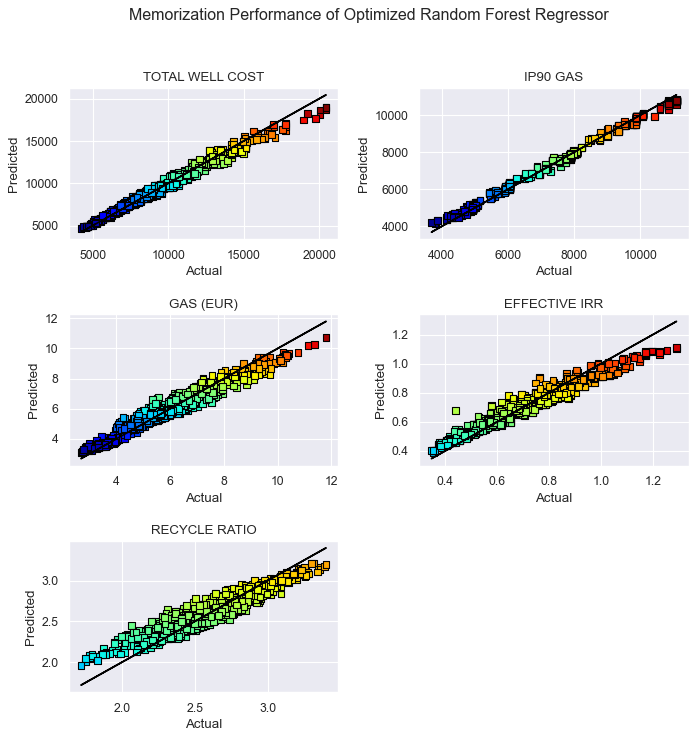

In [71]:
# Visualization of the memorization performance of the optimized RF regressor on training dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Memorization Performance of Optimized Random Forest Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_train_r['TOTAL WELL COST'], y_pred_train3['TOTAL WELL COST'], c=y_pred_train3['TOTAL WELL COST'], vmin=int(y_pred_train3['TOTAL WELL COST'].min()), vmax=int(y_pred_train3['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_train_r['TOTAL WELL COST'], y_train_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_train_r['IP90 GAS'], y_pred_train3['IP90 GAS'], c=y_pred_train3['IP90 GAS'], vmin=int(y_pred_train3['IP90 GAS'].min()), vmax=int(y_pred_train3['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_train_r['IP90 GAS'], y_train_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_train_r['GAS (EUR)'], y_pred_train3['GAS (EUR)'], c=y_pred_train3['GAS (EUR)'], vmin=int(y_pred_train3['GAS (EUR)'].min()), vmax=int(y_pred_train3['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_train_r['GAS (EUR)'], y_train_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_train_r['EFFECTIVE IRR'], y_pred_train3['EFFECTIVE IRR'], c=y_pred_train3['EFFECTIVE IRR'], vmin=int(y_pred_train3['EFFECTIVE IRR'].min()), vmax=int(y_pred_train3['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_train_r['EFFECTIVE IRR'], y_train_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_train_r['RECYCLE RATIO'], y_pred_train3['RECYCLE RATIO'], c=y_pred_train3['RECYCLE RATIO'], vmin=int(y_pred_train3['RECYCLE RATIO'].min()), vmax=int(y_pred_train3['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_train_r['RECYCLE RATIO'], y_train_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

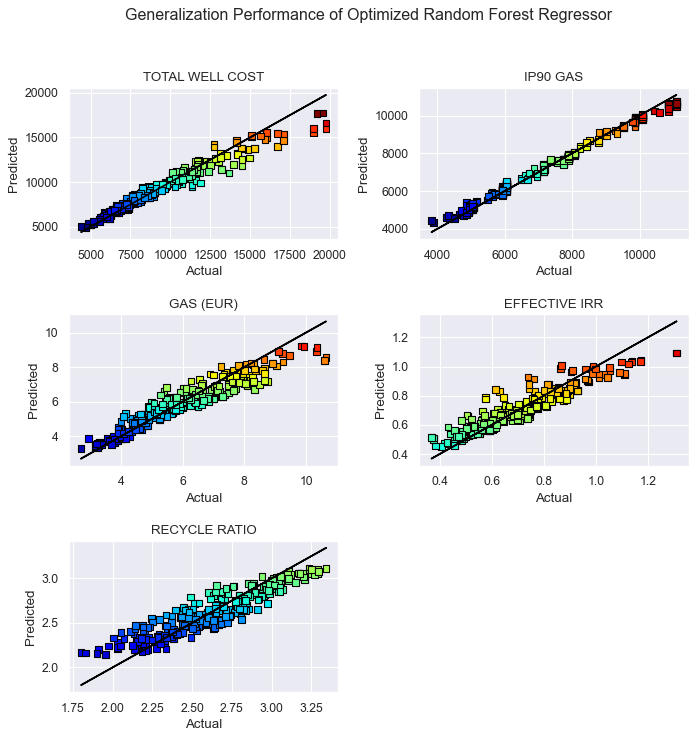

In [72]:
# Visualization of the generalization performance of the optimized RF regressor on testing dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Generalization Performance of Optimized Random Forest Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_test_r['TOTAL WELL COST'], y_pred_test3['TOTAL WELL COST'], c=y_pred_test3['TOTAL WELL COST'], vmin=int(y_pred_test3['TOTAL WELL COST'].min()), vmax=int(y_pred_test3['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_test_r['TOTAL WELL COST'], y_test_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_test_r['IP90 GAS'], y_pred_test3['IP90 GAS'], c=y_pred_test3['IP90 GAS'], vmin=int(y_pred_test3['IP90 GAS'].min()), vmax=int(y_pred_test3['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_test_r['IP90 GAS'], y_test_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_test_r['GAS (EUR)'], y_pred_test3['GAS (EUR)'], c=y_pred_test3['GAS (EUR)'], vmin=int(y_pred_test3['GAS (EUR)'].min()), vmax=int(y_pred_test3['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_test_r['GAS (EUR)'], y_test_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_test_r['EFFECTIVE IRR'], y_pred_test3['EFFECTIVE IRR'], c=y_pred_test3['EFFECTIVE IRR'], vmin=int(y_pred_test3['EFFECTIVE IRR'].min()), vmax=int(y_pred_test3['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_test_r['EFFECTIVE IRR'], y_test_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_test_r['RECYCLE RATIO'], y_pred_test3['RECYCLE RATIO'], c=y_pred_test3['RECYCLE RATIO'], vmin=int(y_pred_test3['RECYCLE RATIO'].min()), vmax=int(y_pred_test3['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_test_r['RECYCLE RATIO'], y_test_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

## 6.5. Gradient Boosting Regressor

In [73]:
# Performing hyperparameter optimization for the Gradient Boosting Regressor
param_grid4 = {'estimator__min_samples_leaf':[1,3,5], 'estimator__max_depth':[2,4,6,8], 'estimator__max_features':[2,3,4,5], 'estimator__n_estimators':[50,100,150,200,250]}
grid4 = GridSearchCV(MultiOutputRegressor(gbr), param_grid=param_grid4, cv=cv1, verbose=3)
grid4.fit(X_train_r, y_train_r)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
[CV 1/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.914 total time=   0.0s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.912 total time=   0.0s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.916 total time=   0.0s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.896 total time=   0.0s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.949 total time=   0.0s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.949 total time=   0.0s
[CV 3

[CV 2/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.969 total time=   0.1s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.974 total time=   0.1s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.968 total time=   0.1s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.976 total time=   0.2s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.974 total time=   0.2s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.981 total time=   0.2s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=2, 

[CV 3/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.963 total time=   0.0s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.953 total time=   0.0s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.969 total time=   0.1s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.967 total time=   0.1s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.974 total time=   0.1s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.965 total time=   0.1s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=3, 

[CV 4/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.979 total time=   0.3s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.925 total time=   0.0s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.927 total time=   0.0s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.939 total time=   0.0s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.916 total time=   0.0s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.958 total time=   0.1s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=4, esti

[CV 1/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.979 total time=   0.2s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.978 total time=   0.2s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.983 total time=   0.3s
[CV 4/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.974 total time=   0.3s
[CV 1/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.984 total time=   0.3s
[CV 2/4] END estimator__max_depth=2, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.981 total time=   0.3s
[CV 3/4] END estimator__max_depth=2, estimator__max_features=5, 

[CV 3/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.983 total time=   0.1s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.977 total time=   0.1s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.984 total time=   0.2s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.983 total time=   0.1s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.987 total time=   0.2s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.981 total time=   0.2s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=2, 

[CV 4/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.986 total time=   0.4s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.967 total time=   0.0s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.967 total time=   0.0s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.973 total time=   0.0s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.965 total time=   0.0s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.982 total time=   0.1s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=3, esti

[CV 1/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.990 total time=   0.4s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.990 total time=   0.4s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.992 total time=   0.4s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.986 total time=   0.4s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.992 total time=   0.5s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.989 total time=   0.5s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=4, 

[CV 2/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.989 total time=   0.2s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.983 total time=   0.2s
[CV 1/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.990 total time=   0.3s
[CV 2/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.990 total time=   0.3s
[CV 3/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.992 total time=   0.3s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=5, 

[CV 3/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.993 total time=   0.6s
[CV 4/4] END estimator__max_depth=4, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.987 total time=   0.6s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.973 total time=   0.0s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.973 total time=   0.0s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.977 total time=   0.0s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.971 total time=   0.0s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=2, esti

[CV 4/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.980 total time=   0.2s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.984 total time=   0.3s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.987 total time=   0.3s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.988 total time=   0.3s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.983 total time=   0.3s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=2, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.983 total time=   0.4s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=2, 

[CV 1/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.989 total time=   0.2s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=100;, score=0.983 total time=   0.2s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.984 total time=   0.3s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=3, estimator__min_samples_leaf=5, estimator__n_estimators=150;, score=0.987 total time=   0.3s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=3, 

[CV 2/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.986 total time=   0.7s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.990 total time=   0.7s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=3, estimator__n_estimators=250;, score=0.983 total time=   0.7s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.976 total time=   0.1s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.981 total time=   0.1s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=4, estimator__min_samples_leaf=5, estimator__n_estimators=50;, score=0.983 total time=   0.1s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=4, est

[CV 3/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.988 total time=   0.5s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.983 total time=   0.5s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.986 total time=   0.6s
[CV 2/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.985 total time=   0.6s
[CV 3/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.988 total time=   0.7s
[CV 4/4] END estimator__max_depth=6, estimator__max_features=5, estimator__min_samples_leaf=3, estimator__n_estimators=200;, score=0.983 total time=   0.7s
[CV 1/4] END estimator__max_depth=6, estimator__max_features=5, 

[CV 4/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.972 total time=   0.0s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.976 total time=   0.2s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.978 total time=   0.2s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.982 total time=   0.2s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=100;, score=0.977 total time=   0.2s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=2, estimator__min_samples_leaf=3, estimator__n_estimators=150;, score=0.975 total time=   0.3s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=2, e

[CV 1/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.977 total time=   0.8s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.978 total time=   0.8s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.980 total time=   0.8s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=1, estimator__n_estimators=250;, score=0.977 total time=   0.8s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.974 total time=   0.1s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=3, estimator__min_samples_leaf=3, estimator__n_estimators=50;, score=0.976 total time=   0.1s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=3, es

[CV 2/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.978 total time=   0.5s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.982 total time=   0.5s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=150;, score=0.976 total time=   0.5s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.978 total time=   0.7s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.979 total time=   0.7s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=4, estimator__min_samples_leaf=1, estimator__n_estimators=200;, score=0.982 total time=   0.7s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=4, 

[CV 3/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.981 total time=   0.2s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=50;, score=0.976 total time=   0.2s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.976 total time=   0.4s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.979 total time=   0.4s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.981 total time=   0.4s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=1, estimator__n_estimators=100;, score=0.976 total time=   0.4s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=5, es

[CV 4/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=200;, score=0.980 total time=   0.7s
[CV 1/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.984 total time=   1.0s
[CV 2/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.984 total time=   0.9s
[CV 3/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.987 total time=   1.0s
[CV 4/4] END estimator__max_depth=8, estimator__max_features=5, estimator__min_samples_leaf=5, estimator__n_estimators=250;, score=0.981 total time=   1.0s


GridSearchCV(cv=KFold(n_splits=4, random_state=125, shuffle=True),
             estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor()),
             param_grid={'estimator__max_depth': [2, 4, 6, 8],
                         'estimator__max_features': [2, 3, 4, 5],
                         'estimator__min_samples_leaf': [1, 3, 5],
                         'estimator__n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [74]:
# Display top 8 GBR models with their associated hyperparameters
Results4 = pd.DataFrame(grid4.cv_results_)
# generate a subset of the table
Results4_tiny = Results4[['param_estimator__min_samples_leaf','param_estimator__max_depth', 'param_estimator__max_features', 'param_estimator__n_estimators',  'mean_test_score']]
# rank them based on cross-validation scores
Results4_tiny.sort_values(by='mean_test_score', ascending=False).head(8)

param_estimator__min_samples_leaf param_estimator__max_depth  \
109                                 1                          4   
119                                 5                          4   
114                                 3                          4   
104                                 5                          4   
94                                  1                          4   
99                                  3                          4   
118                                 5                          4   
84                                  3                          4   

    param_estimator__max_features param_estimator__n_estimators  \
109                             5                           250   
119                             5                           250   
114                             5                           250   
104                             4                           250   
94                              4                           250   
99                              4                           250   
118                             5                           200   
84                              3                           250   

     mean_test_score  
109         0.990524  
119         0.990443  
114         0.990200  
104         0.990191  
94          0.990062  
99          0.989954  
118         0.989640  
84          0.989550

In [75]:
# best/optimal hyperparameters of GB regressor
print(grid4.best_params_)

{'estimator__max_depth': 4, 'estimator__max_features': 5, 'estimator__min_samples_leaf': 1, 'estimator__n_estimators': 250}


In [76]:
# Applying the optimized GB regressor to predict the targets for the training dataset
y_pred_train4=pd.DataFrame(grid4.predict(X_train_r),columns=y_train_r.columns.values)
# Applying the optimized GB regressor to predict the targets for the testing dataset
y_pred_test4=pd.DataFrame(grid4.predict(X_test_r),columns=y_test_r.columns.values)

In [77]:
# Filling up the memorization and generalization performances of optimized GB regressor in R2 criteria dataframe
for i, columns in enumerate(y_train_r.columns):
    r2_mem.GBR[i]=r2_score(y_train_r[columns],y_pred_train4[columns])
    r2_gen.GBR[i]=r2_score(y_test_r[columns],y_pred_test4[columns])

In [78]:
# R2 scores for the memorization and generalization performances of the optimized GB regressor

pd.DataFrame({'GBR_R2_mem': r2_mem['GBR'], 'GBR_R2_gen': r2_gen['GBR']})

GBR_R2_mem GBR_R2_gen
TOTAL WELL COST   0.999647   0.991366
IP90 GAS          0.999924   0.999454
GAS (EUR)         0.999358    0.99315
EFFECTIVE IRR     0.999379   0.984482
RECYCLE RATIO      0.99926   0.993992

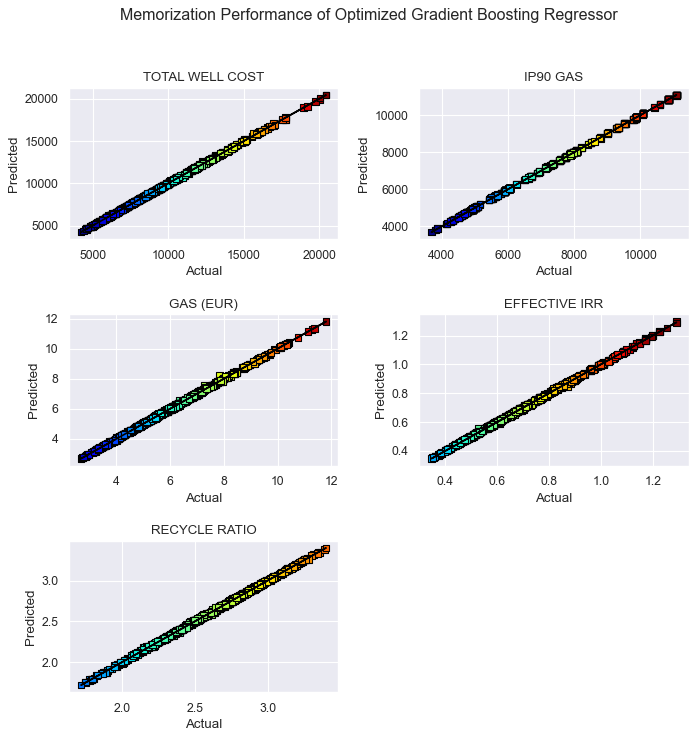

In [79]:
# Visualization of the memorization performance of the optimized GB regressor on training dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Memorization Performance of Optimized Gradient Boosting Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_train_r['TOTAL WELL COST'], y_pred_train4['TOTAL WELL COST'], c=y_pred_train4['TOTAL WELL COST'], vmin=int(y_pred_train4['TOTAL WELL COST'].min()), vmax=int(y_pred_train4['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_train_r['TOTAL WELL COST'], y_train_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_train_r['IP90 GAS'], y_pred_train4['IP90 GAS'], c=y_pred_train4['IP90 GAS'], vmin=int(y_pred_train4['IP90 GAS'].min()), vmax=int(y_pred_train4['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_train_r['IP90 GAS'], y_train_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_train_r['GAS (EUR)'], y_pred_train4['GAS (EUR)'], c=y_pred_train4['GAS (EUR)'], vmin=int(y_pred_train4['GAS (EUR)'].min()), vmax=int(y_pred_train4['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_train_r['GAS (EUR)'], y_train_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_train_r['EFFECTIVE IRR'], y_pred_train4['EFFECTIVE IRR'], c=y_pred_train4['EFFECTIVE IRR'], vmin=int(y_pred_train4['EFFECTIVE IRR'].min()), vmax=int(y_pred_train4['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_train_r['EFFECTIVE IRR'], y_train_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_train_r['RECYCLE RATIO'], y_pred_train4['RECYCLE RATIO'], c=y_pred_train4['RECYCLE RATIO'], vmin=int(y_pred_train4['RECYCLE RATIO'].min()), vmax=int(y_pred_train4['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_train_r['RECYCLE RATIO'], y_train_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

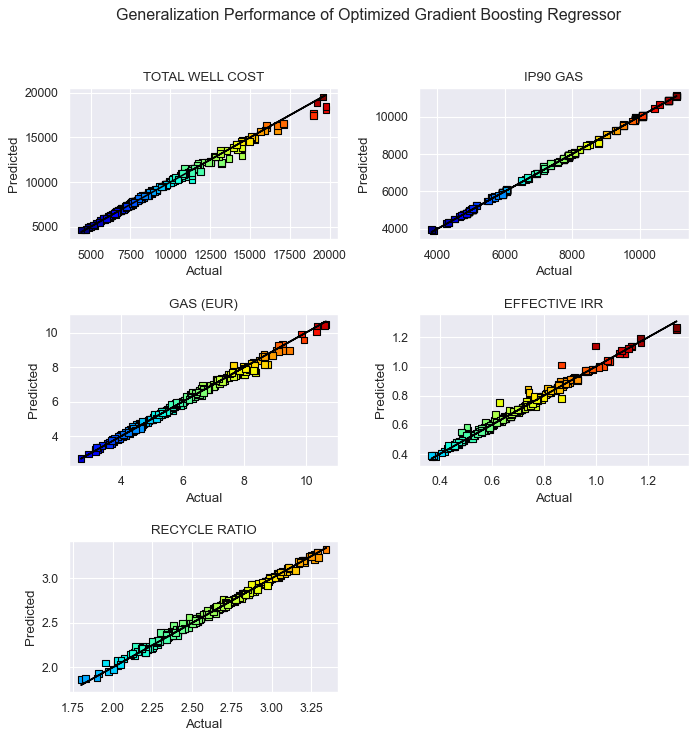

In [80]:
# Visualization of the generalization performance of the optimized GB regressor on testing dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Generalization Performance of Optimized Gradient Boosting Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_test_r['TOTAL WELL COST'], y_pred_test4['TOTAL WELL COST'], c=y_pred_test4['TOTAL WELL COST'], vmin=int(y_pred_test4['TOTAL WELL COST'].min()), vmax=int(y_pred_test4['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_test_r['TOTAL WELL COST'], y_test_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_test_r['IP90 GAS'], y_pred_test4['IP90 GAS'], c=y_pred_test4['IP90 GAS'], vmin=int(y_pred_test4['IP90 GAS'].min()), vmax=int(y_pred_test4['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_test_r['IP90 GAS'], y_test_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_test_r['GAS (EUR)'], y_pred_test4['GAS (EUR)'], c=y_pred_test4['GAS (EUR)'], vmin=int(y_pred_test4['GAS (EUR)'].min()), vmax=int(y_pred_test4['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_test_r['GAS (EUR)'], y_test_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_test_r['EFFECTIVE IRR'], y_pred_test4['EFFECTIVE IRR'], c=y_pred_test4['EFFECTIVE IRR'], vmin=int(y_pred_test4['EFFECTIVE IRR'].min()), vmax=int(y_pred_test4['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_test_r['EFFECTIVE IRR'], y_test_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_test_r['RECYCLE RATIO'], y_pred_test4['RECYCLE RATIO'], c=y_pred_test4['RECYCLE RATIO'], vmin=int(y_pred_test4['RECYCLE RATIO'].min()), vmax=int(y_pred_test4['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_test_r['RECYCLE RATIO'], y_test_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

## 6.6. Neural Network Regressor

In [81]:
# Performing hyperparameter optimization for the Neural Network Regressor
param_grid5 = {'hidden_layer_sizes':[(80),(100),(120),(150)], 'batch_size':[int(len(X_train_r)/15),int(len(X_train_r)/10),int(len(X_train_r)/5)], 'learning_rate':['constant','invscaling','adaptive'], 'alpha':[0.0001,0.001,0.01], 'solver':['lbfgs'], 'max_iter':[3000], 'early_stopping':[True]}
grid5 = GridSearchCV(nn, param_grid=param_grid5, cv=cv1, verbose=3)
grid5.fit(X_train_r, y_train_r)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[CV 1/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.975 total time=   2.8s
[CV 2/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.979 total time=   2.7s
[CV 3/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.941 total time=   2.8s
[CV 4/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.972 total time=   2.7s
[CV 1/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.981 total time=   2.9s
[CV 2/4] END alpha=0.0001, batch_size=57, early_stopping=True, hidden_layer_size

[CV 1/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.974 total time=   2.8s
[CV 2/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.956 total time=   2.8s
[CV 3/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.936 total time=   2.9s
[CV 4/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.830 total time=   2.8s
[CV 1/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.869 total time=   2.9s
[CV 2/4] END alpha=0.0001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, s

[CV 1/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.981 total time=   2.7s
[CV 2/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.882 total time=   2.8s
[CV 3/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.970 total time=   2.7s
[CV 4/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.968 total time=   2.8s
[CV 1/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.986 total time=   2.8s
[CV 2/4] END alpha=0.0001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbf

[CV 1/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.982 total time=   2.8s
[CV 2/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.943 total time=   2.8s
[CV 3/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.974 total time=   2.8s
[CV 4/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.957 total time=   2.8s
[CV 1/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.980 total time=   2.9s
[CV 2/4] END alpha=0.001, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0

[CV 1/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.991 total time=   2.7s
[CV 2/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.764 total time=   2.8s
[CV 3/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.965 total time=   2.6s
[CV 4/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.951 total time=   2.9s
[CV 1/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.974 total time=   2.7s
[CV 2/4] END alpha=0.001, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0

[CV 1/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.955 total time=   2.8s
[CV 2/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.969 total time=   2.8s
[CV 3/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.975 total time=   2.8s
[CV 4/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.949 total time=   2.8s
[CV 1/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.967 total time=   2.9s
[CV 2/4] END alpha=0.001, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, s

[CV 1/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.973 total time=   2.6s
[CV 2/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.928 total time=   2.7s
[CV 3/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.965 total time=   2.8s
[CV 4/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.974 total time=   2.8s
[CV 1/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.967 total time=   2.6s
[CV 2/4] END alpha=0.01, batch_size=57, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.974 t

[CV 2/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.976 total time=   2.8s
[CV 3/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.977 total time=   2.8s
[CV 4/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.972 total time=   2.9s
[CV 1/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.943 total time=   2.9s
[CV 2/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.971 total time=   2.8s
[CV 3/4] END alpha=0.01, batch_size=86, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.976

[CV 3/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.243 total time=   2.8s
[CV 4/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=constant, max_iter=3000, solver=lbfgs;, score=0.962 total time=   2.8s
[CV 1/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.951 total time=   2.8s
[CV 2/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.968 total time=   2.8s
[CV 3/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, score=0.981 total time=   2.9s
[CV 4/4] END alpha=0.01, batch_size=173, early_stopping=True, hidden_layer_sizes=80, learning_rate=invscaling, max_iter=3000, solver=lbfgs;, sco

GridSearchCV(cv=KFold(n_splits=4, random_state=125, shuffle=True),
             estimator=MLPRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [57, 86, 173], 'early_stopping': [True],
                         'hidden_layer_sizes': [80, 100, 120, 150],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [3000], 'solver': ['lbfgs']},
             verbose=3)

In [82]:
# Display top 8 NN models with their associated hyperparameters
Results5 = pd.DataFrame(grid5.cv_results_)
# generate a subset of the table
Results5_tiny = Results5[['param_hidden_layer_sizes','param_batch_size', 'param_learning_rate', 'param_alpha',  'mean_test_score']]
# rank them based on cross-validation scores
Results5_tiny.sort_values(by='mean_test_score', ascending=False).head(8)

param_hidden_layer_sizes param_batch_size param_learning_rate param_alpha  \
103                      120              173          invscaling        0.01   
56                       120               86            adaptive       0.001   
84                        80               86            constant        0.01   
40                       100               57          invscaling       0.001   
1                         80               57          invscaling      0.0001   
64                       100              173          invscaling       0.001   
4                        100               57          invscaling      0.0001   
15                       100               86            constant      0.0001   

     mean_test_score  
103         0.977698  
56          0.977683  
84          0.977038  
40          0.975532  
1           0.974847  
64          0.974827  
4           0.974819  
15          0.974023

In [83]:
# best/optimal hyperparameters of NN regressor
print(grid5.best_params_)

{'alpha': 0.01, 'batch_size': 173, 'early_stopping': True, 'hidden_layer_sizes': 120, 'learning_rate': 'invscaling', 'max_iter': 3000, 'solver': 'lbfgs'}


In [84]:
# Applying the optimized NN regressor to predict the targets for the training dataset
y_pred_train5=pd.DataFrame(grid5.predict(X_train_r),columns=y_train_r.columns.values)
# Applying the optimized NN regressor to predict the targets for the testing dataset
y_pred_test5=pd.DataFrame(grid5.predict(X_test_r),columns=y_test_r.columns.values)

In [85]:
# Filling up the memorization and generalization performances of optimized NN regressor in R2 criteria dataframe
for i, columns in enumerate(y_train_r.columns):
    r2_mem.NN[i]=r2_score(y_train_r[columns],y_pred_train5[columns])
    r2_gen.NN[i]=r2_score(y_test_r[columns],y_pred_test5[columns])

In [86]:
# R2 scores for the memorization and generalization performances of the optimized NN regressor

pd.DataFrame({'NN_R2_mem': r2_mem['NN'], 'NN_R2_gen': r2_gen['NN']})

NN_R2_mem NN_R2_gen
TOTAL WELL COST  0.999945  0.999857
IP90 GAS         0.999868  0.999428
GAS (EUR)        0.992849  0.990339
EFFECTIVE IRR    0.961794  0.941942
RECYCLE RATIO    0.907848  0.907853

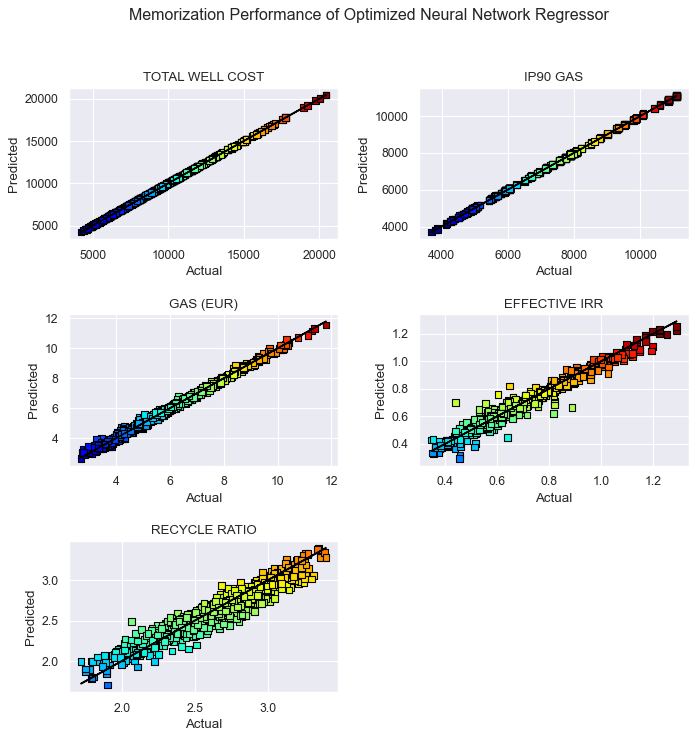

In [87]:
# Visualization of the memorization performance of the optimized NN regressor on training dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Memorization Performance of Optimized Neural Network Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_train_r['TOTAL WELL COST'], y_pred_train5['TOTAL WELL COST'], c=y_pred_train5['TOTAL WELL COST'], vmin=int(y_pred_train5['TOTAL WELL COST'].min()), vmax=int(y_pred_train5['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_train_r['TOTAL WELL COST'], y_train_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_train_r['IP90 GAS'], y_pred_train5['IP90 GAS'], c=y_pred_train5['IP90 GAS'], vmin=int(y_pred_train5['IP90 GAS'].min()), vmax=int(y_pred_train5['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_train_r['IP90 GAS'], y_train_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_train_r['GAS (EUR)'], y_pred_train5['GAS (EUR)'], c=y_pred_train5['GAS (EUR)'], vmin=int(y_pred_train5['GAS (EUR)'].min()), vmax=int(y_pred_train5['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_train_r['GAS (EUR)'], y_train_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_train_r['EFFECTIVE IRR'], y_pred_train5['EFFECTIVE IRR'], c=y_pred_train5['EFFECTIVE IRR'], vmin=int(y_pred_train5['EFFECTIVE IRR'].min()), vmax=int(y_pred_train5['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_train_r['EFFECTIVE IRR'], y_train_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_train_r['RECYCLE RATIO'], y_pred_train5['RECYCLE RATIO'], c=y_pred_train5['RECYCLE RATIO'], vmin=int(y_pred_train5['RECYCLE RATIO'].min()), vmax=int(y_pred_train5['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_train_r['RECYCLE RATIO'], y_train_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

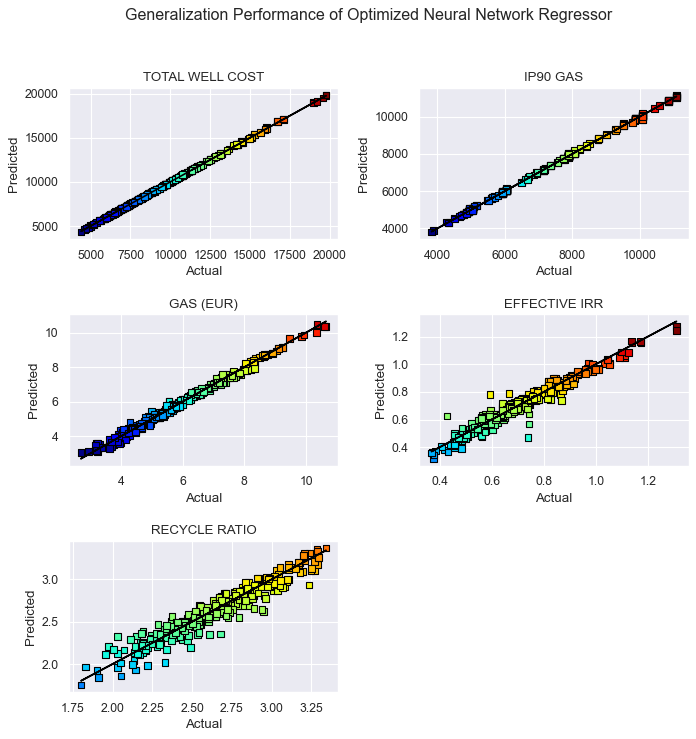

In [88]:
# Visualization of the generalization performance of the optimized NN regressor on testing dataset

fig, axes = plt.subplots(nrows=3, ncols=2, dpi = 80, figsize=(10,10))
fig.suptitle('Generalization Performance of Optimized Neural Network Regressor')
fig.subplots_adjust(wspace=0.3,hspace=0.5)
cm = plt.cm.get_cmap('jet')

axes[0,0].set(title='TOTAL WELL COST')
axes[0,1].set(title='IP90 GAS')
axes[1,0].set(title='GAS (EUR)')
axes[1,1].set(title='EFFECTIVE IRR')
axes[2,0].set(title='RECYCLE RATIO')
fig.delaxes(axes[2,1])

axes[0,0].scatter(y_test_r['TOTAL WELL COST'], y_pred_test5['TOTAL WELL COST'], c=y_pred_test5['TOTAL WELL COST'], vmin=int(y_pred_test5['TOTAL WELL COST'].min()), vmax=int(y_pred_test5['TOTAL WELL COST'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,0].plot(y_test_r['TOTAL WELL COST'], y_test_r['TOTAL WELL COST'], c='black')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

axes[0,1].scatter(y_test_r['IP90 GAS'], y_pred_test5['IP90 GAS'], c=y_pred_test5['IP90 GAS'], vmin=int(y_pred_test5['IP90 GAS'].min()), vmax=int(y_pred_test5['IP90 GAS'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[0,1].plot(y_test_r['IP90 GAS'], y_test_r['IP90 GAS'], c='black')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

axes[1,0].scatter(y_test_r['GAS (EUR)'], y_pred_test5['GAS (EUR)'], c=y_pred_test5['GAS (EUR)'], vmin=int(y_pred_test5['GAS (EUR)'].min()), vmax=int(y_pred_test5['GAS (EUR)'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[1,0].plot(y_test_r['GAS (EUR)'], y_test_r['GAS (EUR)'], c='black')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

axes[1,1].scatter(y_test_r['EFFECTIVE IRR'], y_pred_test5['EFFECTIVE IRR'], c=y_pred_test5['EFFECTIVE IRR'], vmin=int(y_pred_test5['EFFECTIVE IRR'].min()), vmax=int(y_pred_test5['EFFECTIVE IRR'].max())+0.2, marker='s', edgecolors='black', cmap=cm)
axes[1,1].plot(y_test_r['EFFECTIVE IRR'], y_test_r['EFFECTIVE IRR'], c='black')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

axes[2,0].scatter(y_test_r['RECYCLE RATIO'], y_pred_test5['RECYCLE RATIO'], c=y_pred_test5['RECYCLE RATIO'], vmin=int(y_pred_test5['RECYCLE RATIO'].min()), vmax=int(y_pred_test5['RECYCLE RATIO'].max())+1, marker='s', edgecolors='black', cmap=cm)
axes[2,0].plot(y_test_r['RECYCLE RATIO'], y_test_r['RECYCLE RATIO'], c='black')
axes[2,0].set_xlabel('Actual')
axes[2,0].set_ylabel('Predicted')

plt.show()

### After several trials with different neural network structures, it can be concluded that a single-layer wide neural network is the best structure as a regressor for the given training and testing dataset, and it outperforms deep neural networks with multiple layers that suffer from vanishing gradient and low R2 scores.

# 7. Summary

## 7.1. Memorization and Generalization Performance of Different Data-Driven Models

In [89]:
# Memorization performance of differnet regression models
r2_mem

EN       SVR       RFR       GBR        NN
TOTAL WELL COST  0.943167  0.834023  0.979649  0.999647  0.999945
IP90 GAS         0.929456   0.94036  0.993415  0.999924  0.999868
GAS (EUR)         0.96537  0.998541  0.933617  0.999358  0.992849
EFFECTIVE IRR    0.866716  0.926389   0.92541  0.999379  0.961794
RECYCLE RATIO    0.888654  0.972444  0.869255   0.99926  0.907848

<function matplotlib.pyplot.show(close=None, block=None)>

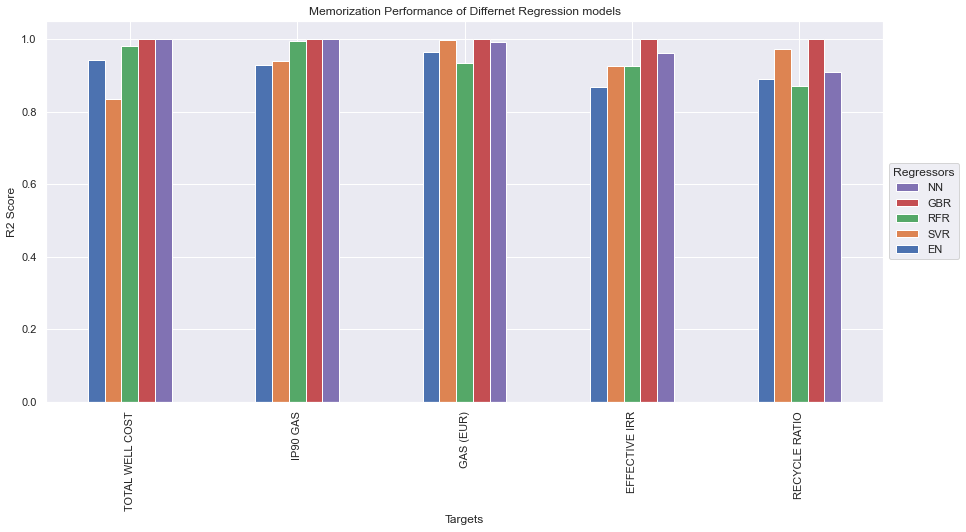

In [90]:
# Visualization of memorization performance of differnet regression models
ax = r2_mem.plot.bar(stacked=False,title='Memorization Performance of Differnet Regression models',figsize=(15,7))
plt.xlabel('Targets')
plt.ylabel('R2 Score')
plt.ylim(bottom=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))
plt.show

In [91]:
# Generalization performance of differnet regression models
r2_gen

EN       SVR       RFR       GBR        NN
TOTAL WELL COST  0.938471  0.819244  0.935171  0.991366  0.999857
IP90 GAS         0.930999  0.939741  0.989039  0.999454  0.999428
GAS (EUR)         0.96588  0.998281  0.886268   0.99315  0.990339
EFFECTIVE IRR    0.846639  0.910081  0.854259  0.984482  0.941942
RECYCLE RATIO    0.903472  0.969369  0.818257  0.993992  0.907853

<function matplotlib.pyplot.show(close=None, block=None)>

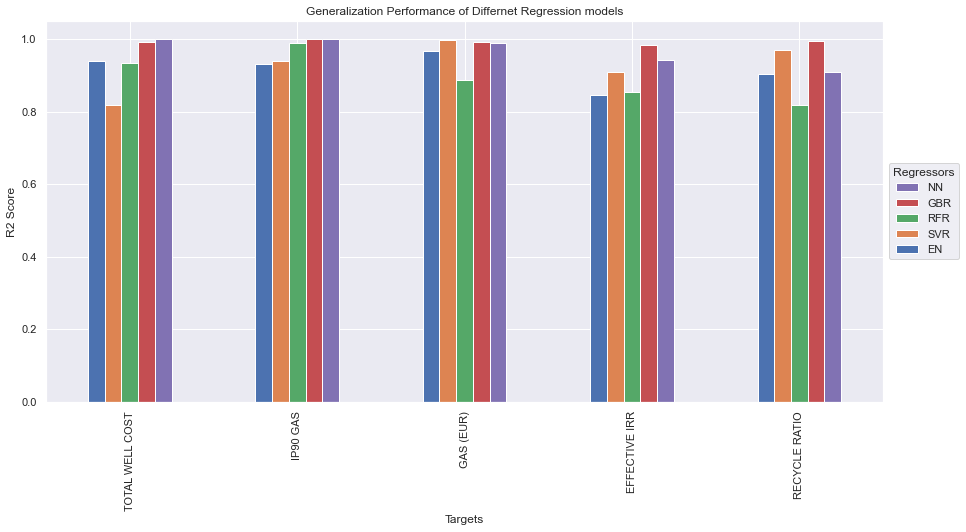

In [92]:
# Visualization of generalization performance of differnet regression models
ax = r2_gen.plot.bar(stacked=False,title='Generalization Performance of Differnet Regression models',figsize=(15,7))
plt.xlabel('Targets')
plt.ylabel('R2 Score')
plt.ylim(bottom=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Regressors', loc='center left', bbox_to_anchor=(1,.5))
plt.show

In [93]:
# Summerizing the results in a single dataframe by calculating the mean of each regressor.
# Sorting the regressors based on their generalization performance.
summary = pd.DataFrame(r2_gen.mean(axis=0),columns=['Mean_R2_gen']).sort_values(by='Mean_R2_gen', ascending=False)
summary

Mean_R2_gen
GBR     0.992489
NN      0.967884
SVR     0.927343
EN      0.917092
RFR     0.896599

### Several points can be highlighted from the consolidated results of different data-driven models:

### 1. All of the implemented regressors are acceptable since they all yielded high memorization and generalization R2 scores with least differences betweem them. This is due to the successful implementation of the pre-processing strategies applied to the raw data, and the attentive selection of the important features through collinearity and quantity association analysis between the features and the targets. 

### 2. Elastic Net regressor is the simplest data-driven model among the other models, and it is considered as a benchmark model in this study. It can be observed from the hyperparameters optimization that the best EN regressor has a strength of regularization (alpha) of 0.001 and a L1 ratio of zero, this indicates that the best EN model is not penalizing and removing the features that were selected in the pre-processing stage which servers as a further indicator that the selected features are the optimum features that have the highest impact in predicting the well deliverables and economic metrics.

### 3. Due to the complex nature of the completion data and the heterogeneity that exists intrinsically in unconventional reservoirs, the high-complexity regressors were the ones that performe the best in predicting the well deliverables and economic metrics as demonstrated in the figures above; with Gradient Boosting regressor being the best regressor with astounding results to be the most generalizable data-driven model among the other models due to its robustness in optimizing arbitrary differentiable loss functions as a tree-based algorithm with large number of boosting stages, then the neural network regressor with a single hidden layer and 120 neurons is the second best after the GB regressor, then lastly the support vector regressor is the third best model which leverages the kernel trick in mapping the high-complexity data in a higher-dimensional space to establish a better relationship between the features and the targets that facilitates the predictability of the model.

## 7.2. Selection of Three Best Models

In [94]:
# Results sorted based on the mean of R2 generalization scores
summary

Mean_R2_gen
GBR     0.992489
NN      0.967884
SVR     0.927343
EN      0.917092
RFR     0.896599

In [113]:
# Selecting the first best model
if summary.iloc[0].name == 'EN':
    model1st = grid1
elif summary.iloc[0].name == 'SVR':
    model1st = grid2
elif summary.iloc[0].name == 'RFR':
    model1st = grid3
elif summary.iloc[0].name == 'GBR':
    model1st = grid4
elif summary.iloc[0].name == 'NN':
    model1st = grid5

# Selecting the second best model
if summary.iloc[1].name == 'EN':
    model2nd = grid1
elif summary.iloc[1].name == 'SVR':
    model2nd = grid2
elif summary.iloc[1].name == 'RFR':
    model2nd = grid3
elif summary.iloc[1].name == 'GBR':
    model2nd = grid4
elif summary.iloc[1].name == 'NN':
    model2nd = grid5

# Selecting the third best model
if summary.iloc[2].name == 'EN':
    model3rd = grid1
elif summary.iloc[2].name == 'SVR':
    model3rd = grid2
elif summary.iloc[2].name == 'RFR':
    model3rd = grid3
elif summary.iloc[2].name == 'GBR':
    model3rd = grid4
elif summary.iloc[2].name == 'NN':
    model3rd = grid5

# 8. Exporting Models

## 8.1. Exporting Pre-Processing Strategies

In [117]:
# Exporting pre-processing strategies
filename = 'outlier1st.sav'
pickle.dump(iforest, open(filename, 'wb'))

filename = 'scaler.sav'
pickle.dump(rscaler, open(filename, 'wb'))

filename = 'transformer.sav'
pickle.dump(transformer, open(filename, 'wb'))

filename = 'outlier2nd.sav'
pickle.dump(iforest2, open(filename, 'wb'))

## 8.2. Exporting Best Three Data-Driven Models

In [118]:
# Exporting the three best data-driven models
filename = 'model1.sav'
pickle.dump(model1st, open(filename, 'wb'))

filename = 'model2.sav'
pickle.dump(model2nd, open(filename, 'wb'))

filename = 'model3.sav'
pickle.dump(model3rd, open(filename, 'wb'))